# Principal component analysis
Machine learning in general works wonders when the dataset provided for training the machine is large and concise. Usually having a good amount of data lets us build a better predictive model since we have more data to train the machine with. However, using a large dataset has its own pitfalls. The biggest pitfall is the curse of dimensionality. 

It turns out that in large dimenstional datasets, there might be lots of inconsistencies in the features or lots of redundant featurs in the dataset, which only will increase the computation time and make data processing and EDA more convoluted. 

To get rid of the curse of dimensionality, a process called dimensionality reduction was introduced. Dimensionality reduction techniques can be used to filter only in a limited number of significant features needed for training and this is where PCA comes in. 

## What is PCA?
Principal Components Analysis (PCA) is dimensionality reduction technique that enables you to identify correlations and patters in a data set so that it can be transofmred into a data set of significantly lower dimension without loss of any important information. 

## Step-by-Step Computation of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:

- Standardization of the data
- Computing the covariance matrix
- Calculating the eigenvectors and eigenvalues
- Computing the Principal Components
- Reducing the dimensions of the data set

Here are all the steps in detail: 

### Step 1: Standardization of the data 
Standardization is all about scaling your data in such a way that all the variables and their values lie within a similar range. 

Consider an example, let's say that we have 2 variables in a our data set, one has values ranging between 0 - 100 and the other has values between 1,000 - 5,000. In such a scenario, it is obvious that the output calculated by using these predictor variables is going to be biased since the variable with a larger range will have a more obvious impact on the outcome. 

Therefore, standardizing the data into a comparable range is very important. Standardization is carried out by subtracting each value in the data from the mean and dividing it by the overall deviation in the data set. 

It can be calculated like so:

Z = (Variable value - mean)/Standard deviation
                
Post this step, all the variables in the data are scaled across a standard and comparable scale. 

### Step 2: Computing the covariance matrix
As mentioned earlier, PCA helps to identify the correlation and dependencies among the features in a data set. A covariance matrix expresses the correlation between the different variables in the data set. It is essential to identify heavily dependent variables because they contain biased and redundant information which reduces the overall performance of the model. 

Mathematically, a covariance matrix is a p x p matrix, where p represents the dimensions of the data set. Each entry in the matrix represents the covariance of the corresponding variables. 

Consider a case where we have a 2D data set with variables a and b, the covariance matrix is a 2 x 2 matrix as show below

$$\begin{bmatrix}
Cov(a,a) & Cov(a,b) \\
Cov(b,a) & Cov(b,b) 
\end{bmatrix}$$

In the above matrix:
- Cov(a,a) represents the covariance of a variable with itself, which is nothing but the variance of the variable 'a'
- Cov(a,b) represents the covariance of the variable 'a' with respect to the variable 'b'. And since covariance is commutative, Cov(a,b) = Cov(b,a)

Here are the key takeaways from the covariance matrix:

- The covariance values denotes how co-dependent two variables are with respect to each other
- If the covariance value is negative, it denotes the respective variables are indirectly proportional to each other
- A positive covariance denotes that the respective variables are directly proportional to each other

### Step 3: Calculating the Eigenvectors and Eigenvalues
Eigenvectors and eigenvalues are the mathematical constructs that must be computed from the covariance matrix in order to deteremine the principal components of the data set. But first, let's understand more about principal components

### What are principal components?
Simply put, principal components are the new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly oobtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables. 

If your data set is of 5 dimensions, then 5 principal components are computed, such that, the first principal component stores the maximium possible information and the second one stores the remaining maximum info and so on, you get the idea. 

Now, where do Eigenvectors fall into this whole process?

Assuming that all have a basic understanding of Eigenvectors and eigenvalues, we know that these two algebraic forumaltions are always computed as a pair, i.e., for every eigenvector there is an eigenvalue. The dimensions in the data determine the number of eigenvectors that you need to calculate. 

Consider a 2-Dimensional data set, for which 2 eigenvectors (and their respective eigenvalues) are computed. The idea behind eigenvectors is to use the Covariance matrix to understnad where in the data there is the most amount of variance. Since more variance in the data denotes more information about the data, eigenvectors are used to identify and compute Principal Components. 

Eigenvalues, on the other hand, simply denote the scalars of the respective eigenvectors. Therefore, eigenvectors and eigenvalues will compute the Principal Components of the data set.

### Step 4: Computing the Principal Components
Once we have computed the Eigenvectors and eigenvalues, all we have to do is order them in the descending order, where the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. The principal components of lesser significances can thus be removed in order to reduce the dimensions of the data. 

The final step in computing the Principal Components is to form a matrix known as the feature matrix that contains all the significant data variables that possess maximum information about the data. 

### Step 5: Reducing the dimensions of the data set
The last step in performing PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiple the transpose of the original data set by the transpose of the obtained feature vector. 

So that was the theory behind the entire PCA process. It's time to get our hands dirty and perform all these steps by using a real data set. 

## Principal Component Analysis Using Python
In this section, we will be performing PCA by using Python.

#### Problem statement: 
To perform step-by-step Principal Component Analysis in order to reduce the dimension of the data set.

#### Data Set Description:
Movies rating data set that contains ratings from 700+ users for approximately 9,000 movies (features).

#### Logic:
Perform PCA. by finding the most significant features in teh data. PCA will be perfroemd by following the steps that were defined above

#### Step 1: Import required packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import *
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

#### Step 2: Import data set

In [2]:
#Load movie names and movie ratings
movies = pd.read_csv('~/Documents/GitHub/professional-development/PCA/movies.csv')
ratings = pd.read_csv('~/Documents/GitHub/professional-development/PCA/ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


#### Step 3: Formatting the data

In [5]:
def replace_name(x):
    return movies[movies['movieId'] == x].title.values[0]

In [6]:
ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)

#### Step 4: Standardization
In the below line of code, we use the StandardScalar() function provided by the sklearn package in order to scale the data set within the comparable ranges. As discussed earlier, standardization is required to prevent biases in the final outcome.

In [7]:
X_std = StandardScaler().fit_transform(df1)

In [8]:
df1.head()

movieId,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_std

array([[-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
         5.84559005, -0.04052204],
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       ...,
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       [24.67792536, -0.04052204, -0.05735393, ...,  8.02741663,
        -0.2019994 , -0.04052204]])

#### Step 5: Compute covariance matrix
As discussed earlier, a covariance matrix expresses the correlation between the different features in the data set. It is essential to identify heavily dependent variables because they contain biased and redundant information which reduces the overall performance of the model. The below code snippet computes the covariance matrix for the data:

In [10]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


#### Step 6: Calculate eigenvectors and eigenvalues
In this step eigenvectors and eigenvalues are calculated which basically compute the Principal Components of the data set.

In [11]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-6.17879786e-03+0.j  7.13214703e-03+0.j  3.60191232e-03+0.j ...
  -5.96877165e-10+0.j  4.66208327e-10+0.j  4.72624875e-10+0.j]
 [-1.37389338e-04+0.j -6.19748724e-05+0.j -2.68242736e-06+0.j ...
  -8.66907393e-12+0.j  3.96467119e-11+0.j  3.95263367e-11+0.j]
 [ 3.98116838e-05+0.j -1.70073920e-04+0.j -3.54723573e-05+0.j ...
   1.43642937e-10+0.j -1.17443588e-10+0.j -1.18714594e-10+0.j]
 ...
 [-5.71402600e-03+0.j  4.61929109e-03+0.j  3.30601109e-03+0.j ...
  -3.19724058e-09+0.j  2.91126957e-09+0.j  2.94290881e-09+0.j]
 [-1.45210348e-02+0.j -3.31390410e-04+0.j  3.25182697e-03+0.j ...
   1.11065414e-09+0.j -1.37503090e-09+0.j -1.37799259e-09+0.j]
 [-3.15495954e-05+0.j -1.35658850e-04+0.j -4.29513318e-05+0.j ...
   1.45005318e-08+0.j -1.65303417e-08+0.j -1.66397853e-08+0.j]]
nEigenvalues n[ 6.94634737e+02+0.j  4.87220689e+02+0.j  4.38988949e+02+0.j ...
 -5.37495197e-51+0.j  4.11028171e-52+0.j  3.11963132e-63+0.j]


In [12]:
print(X_std.T)

[[-0.04052204 -0.04052204 -0.04052204 ... -0.04052204 -0.04052204
  24.67792536]
 [-0.04052204 -0.04052204 -0.04052204 ... -0.04052204 -0.04052204
  -0.04052204]
 [-0.05735393 -0.05735393 -0.05735393 ... -0.05735393 -0.05735393
  -0.05735393]
 ...
 [-0.08870074 -0.08870074 -0.08870074 ... -0.08870074 -0.08870074
   8.02741663]
 [ 5.84559005 -0.2019994  -0.2019994  ... -0.2019994  -0.2019994
  -0.2019994 ]
 [-0.04052204 -0.04052204 -0.04052204 ... -0.04052204 -0.04052204
  -0.04052204]]


#### Step 7: Compute the feature vector 
In this step, we rearrange the eigenvalues in descending order. This represents the significance of the principal components in descending order:

In [13]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
694.6347372544965
487.2206886294059
438.9889489555736
379.0404527252998
324.3162458652462
259.1091962886276
251.67075199496617
226.08065316490547
206.7704320238969
186.08012008011931
180.35681567362883
150.5768982687854
140.5335104255668
135.0042554377563
116.75931121355612
111.22844429826334
105.98588556400051
101.52061108863403
92.38143975955767
87.20146448316832
83.94704525828456
76.51329078142055
73.12943769509839
71.33450019035203
68.66916875072977
68.11563805135066
66.09778445224114
64.79772886519716
64.76738664207933
60.57541016802242
60.09570157695381
58.4440622031306
57.14388076236275
55.703697008515384
55.15327698764673
54.42361668166456
53.623116971407335
49.754253302721246
49.225689583010286
47.79220889336284
46.74358114245114
46.445279880805145
45.33955134746953
45.099947620965565
44.61986596644093
44.25650246763823
43.96138776159142
42.67209649629766
41.738887045202155
41.05033324888562
41.226910399687064
40.021144104127046
39.198143822753

5.32553916843348e-14
5.32553916843348e-14
5.299595700770831e-14
5.2368495154456127e-14
5.2368495154456127e-14
5.275779184296411e-14
5.275779184296411e-14
5.321638444194752e-14
5.16317543651834e-14
5.16317543651834e-14
5.2401709622390445e-14
5.2401709622390445e-14
5.1794743562064207e-14
5.1877318466837356e-14
5.1877318466837356e-14
5.1903478634711486e-14
5.2676841868186325e-14
5.2676841868186325e-14
5.230263704705025e-14
5.230263704705025e-14
5.2855527373620686e-14
5.138829944690408e-14
5.138829944690408e-14
5.122367292997845e-14
5.243963499255692e-14
5.243963499255692e-14
5.225627298484016e-14
5.225627298484016e-14
5.152313026211288e-14
5.152313026211288e-14
5.191693020896015e-14
5.191693020896015e-14
5.1981656442878845e-14
5.1981656442878845e-14
5.222040875680258e-14
5.169459244782421e-14
5.158668337454496e-14
5.058002497614024e-14
5.058002497614024e-14
5.077571182881673e-14
5.077571182881673e-14
5.0869326112553806e-14
5.0869326112553806e-14
5.105228316612233e-14
5.0848945382506315e-1

4.167259705402831e-14
4.1546590921935725e-14
4.1546590921935725e-14
4.1854346906737544e-14
4.1854346906737544e-14
4.183040326688709e-14
4.038295016979058e-14
4.038295016979058e-14
4.070914865323779e-14
4.070914865323779e-14
4.066661839398944e-14
3.949666484243919e-14
3.949666484243919e-14
4.0462045971579736e-14
4.0462045971579736e-14
4.0559033341783204e-14
4.0559033341783204e-14
4.0234532828850386e-14
4.0234532828850386e-14
4.081811242457699e-14
3.945665056908185e-14
3.945665056908185e-14
3.981334327293764e-14
3.981334327293764e-14
3.9684128098557223e-14
4.159894850458017e-14
4.1143978886680275e-14
4.1143978886680275e-14
4.1275429071142213e-14
4.1275429071142213e-14
4.0856969372678256e-14
4.0856969372678256e-14
4.139916247293748e-14
3.988248731296117e-14
3.988248731296117e-14
4.0162657784723744e-14
4.0162657784723744e-14
4.034912442210171e-14
4.034912442210171e-14
4.009393341190601e-14
4.009393341190601e-14
4.023781142426333e-14
4.0840160550269807e-14
4.0840160550269807e-14
4.071425884

2.5296899693409518e-14
2.6064196078530898e-14
2.6064196078530898e-14
2.595246104625686e-14
2.595246104625686e-14
2.577196489575654e-14
2.577196489575654e-14
2.5597651726021138e-14
2.5597651726021138e-14
2.604766735856374e-14
2.5044444946446743e-14
2.5044444946446743e-14
2.545054195267754e-14
2.545054195267754e-14
2.3231420251947282e-14
2.3231420251947282e-14
2.6284039689114667e-14
2.6284039689114667e-14
2.6977758508490695e-14
2.6977758508490695e-14
2.6718045754357373e-14
2.6718045754357373e-14
2.5232710873350835e-14
2.5933152936912102e-14
2.5281071418245943e-14
2.3364430561494874e-14
2.3364430561494874e-14
2.4732710488379786e-14
2.4732710488379786e-14
2.3833066127703206e-14
2.3833066127703206e-14
2.646744202200685e-14
2.646744202200685e-14
2.6772535548288562e-14
2.67050623066349e-14
2.67050623066349e-14
2.3227923544649468e-14
2.3227923544649468e-14
2.325776743129453e-14
2.325776743129453e-14
2.6685224482632097e-14
2.4195987041571042e-14
2.4195987041571042e-14
2.347422758164432e-14
2.34

2.1111838903076272e-14
1.919860097510706e-14
1.919860097510706e-14
2.0503328551046663e-14
2.0503328551046663e-14
2.061800309546885e-14
2.061800309546885e-14
2.0673356638568748e-14
2.0673356638568748e-14
2.0657673611599783e-14
1.956306078719205e-14
1.956306078719205e-14
2.0821821429400038e-14
2.0821821429400038e-14
2.1189102966487765e-14
2.1189102966487765e-14
1.996688377670379e-14
1.996688377670379e-14
2.0270312846975524e-14
2.0270312846975524e-14
2.0467936698242745e-14
2.0467936698242745e-14
2.028295616426605e-14
2.028295616426605e-14
2.099172147469413e-14
2.099172147469413e-14
2.0796716268985358e-14
2.0796716268985358e-14
2.109617113730563e-14
2.109617113730563e-14
1.9691475705724093e-14
1.9691475705724093e-14
2.0294705362458182e-14
2.0294705362458182e-14
2.1035889300586048e-14
2.087842373213064e-14
2.087842373213064e-14
1.994153336295231e-14
1.994153336295231e-14
2.0115845257209923e-14
2.0115845257209923e-14
2.01903066886571e-14
2.01903066886571e-14
2.001007251105101e-14
2.001007251

9.729775884446993e-15
1.1107258636559461e-14
1.1107258636559461e-14
1.0919224146276589e-14
1.0919224146276589e-14
1.1919614927937277e-14
1.1919614927937277e-14
1.2163591168647488e-14
1.2163591168647488e-14
1.2053452472375711e-14
1.2053452472375711e-14
1.182114006399353e-14
1.182114006399353e-14
1.194582705380665e-14
1.194582705380665e-14
1.2023031650040586e-14
1.2023031650040586e-14
1.2086222175592982e-14
1.2086222175592982e-14
1.2134688462659754e-14
1.2134688462659754e-14
1.2268926579586628e-14
1.2268926579586628e-14
1.1954713849838264e-14
1.1954713849838264e-14
1.2195645324499226e-14
1.2195645324499226e-14
1.1968103916387128e-14
1.1968103916387128e-14
1.1957305449101113e-14
1.2158131724044175e-14
1.2158131724044175e-14
1.2136364354426406e-14
1.2136364354426406e-14
1.2220494247410005e-14
1.2287782172860259e-14
1.2287782172860259e-14
1.2405078723419818e-14
1.2405078723419818e-14
1.2005986419456588e-14
6.0126054179092635e-15
6.0126054179092635e-15
4.549092367326605e-15
4.549092367326605

8.754612266014301e-15
8.754612266014301e-15
8.762806980012398e-15
8.762806980012398e-15
8.797979460850217e-15
8.8625201226106e-15
8.8625201226106e-15
3.9150008512873174e-15
3.9150008512873174e-15
4.441472248611331e-15
4.441472248611331e-15
3.684817428991945e-15
3.684817428991945e-15
5.094238906667013e-15
5.094238906667013e-15
3.0935144208747245e-15
3.0935144208747245e-15
2.634357345144261e-15
2.634357345144261e-15
4.8582616085707764e-15
4.8582616085707764e-15
4.506604671566749e-15
4.506604671566749e-15
5.5030778009684655e-15
5.5030778009684655e-15
7.14748768006517e-15
7.14748768006517e-15
6.3224901990032315e-15
6.3224901990032315e-15
6.4725255630257686e-15
6.4725255630257686e-15
8.094116557424703e-15
8.094116557424703e-15
8.215421790325633e-15
8.215421790325633e-15
8.39029125597524e-15
8.39029125597524e-15
8.16115894166083e-15
8.16115894166083e-15
8.245173235028181e-15
8.245173235028181e-15
7.945141792848325e-15
7.945141792848325e-15
8.587995618794927e-15
8.587995618794927e-15
8.137467

1.341174306338662e-15
1.341174306338662e-15
2.219978513060593e-15
2.219978513060593e-15
2.178625639636267e-15
2.178625639636267e-15
1.8901944314328046e-15
1.8901944314328046e-15
2.380311625006931e-15
2.3525373677243744e-15
2.3525373677243744e-15
1.2029519974894338e-15
1.2029519974894338e-15
2.258377498349536e-15
2.258377498349536e-15
1.6595284899210915e-15
1.6595284899210915e-15
2.2875134311045253e-15
2.2875134311045253e-15
1.9338911905265616e-15
1.9338911905265616e-15
1.443728364805818e-15
1.443728364805818e-15
2.265677161031214e-15
2.265677161031214e-15
1.212331330310518e-15
1.212331330310518e-15
1.3835018264947214e-15
1.3835018264947214e-15
1.8299955264113157e-15
1.8299955264113157e-15
1.7207909860871909e-15
1.7207909860871909e-15
2.1106171360230592e-15
2.1106171360230592e-15
1.2581054003839154e-15
1.2581054003839154e-15
1.4594655629788733e-15
1.4594655629788733e-15
1.962603795925857e-15
1.962603795925857e-15
2.254654965739612e-15
2.069622025765025e-15
2.069622025765025e-15
2.294141

4.532219098900384e-17
4.266373338819285e-17
4.115609027462161e-17
3.9459566271384635e-17
3.9459566271384635e-17
3.1025033779787976e-17
2.982625449336483e-17
2.982625449336483e-17
2.9991991228679296e-17
2.9991991228679296e-17
3.0211374281606777e-17
3.0211374281606777e-17
2.847922349428236e-17
2.847922349428236e-17
2.8562510950669016e-17
2.485869193371645e-17
2.485869193371645e-17
2.3488302958703488e-17
2.3488302958703488e-17
2.0676047461876618e-17
2.0676047461876618e-17
1.9342959234153638e-17
1.9342959234153638e-17
1.806850200269511e-17
1.806850200269511e-17
1.634891372423288e-17
1.634891372423288e-17
1.534740148132243e-17
1.4194765317193033e-17
1.348825292067972e-17
1.348825292067972e-17
1.3323070603228495e-17
1.3323070603228495e-17
1.1642852940822685e-17
1.1642852940822685e-17
1.1057847324388379e-17
1.1057847324388379e-17
9.424467905434769e-18
9.424467905434769e-18
9.506164475506464e-18
9.506164475506464e-18
8.443270530856154e-18
8.364900439405765e-18
8.364900439405765e-18
7.671419123

9.657366037604763e-30
9.657366037604763e-30
9.278392498924789e-30
9.278392498924789e-30
9.596853299382401e-30
9.596853299382401e-30
9.118937811484391e-30
9.118937811484391e-30
9.44773082077153e-30
9.44773082077153e-30
9.574752152777076e-30
9.574752152777076e-30
9.184431922571622e-30
9.184431922571622e-30
9.340175321373426e-30
9.340175321373426e-30
9.311881019084576e-30
9.311881019084576e-30
8.885278058264366e-30
8.885278058264366e-30
8.94058305654162e-30
8.94058305654162e-30
9.133233456375935e-30
9.133233456375935e-30
9.554193206293944e-30
9.554193206293944e-30
9.363755435300556e-30
9.363755435300556e-30
9.341120436176568e-30
9.341120436176568e-30
9.322805317992179e-30
9.322805317992179e-30
9.161177503700506e-30
9.161177503700506e-30
8.97253778698132e-30
8.97253778698132e-30
9.014047980554309e-30
8.777645094541286e-30
8.777645094541286e-30
9.053697337110629e-30
9.053697337110629e-30
8.819172717804577e-30
8.819172717804577e-30
8.930172083666833e-30
8.930172083666833e-30
8.58608807478904

2.117365695095837e-30
2.141864600316684e-30
2.141864600316684e-30
2.2627002564447296e-30
2.255184459746296e-30
2.255184459746296e-30
2.217549025738995e-30
2.217549025738995e-30
2.206272310887303e-30
2.206272310887303e-30
2.0856407662880686e-30
2.0856407662880686e-30
2.2091778265543018e-30
2.119718039276617e-30
2.119718039276617e-30
2.1572843536517576e-30
2.1572843536517576e-30
2.017231598303893e-30
2.017231598303893e-30
2.011462124515388e-30
2.011462124515388e-30
2.0217310043153596e-30
2.0217310043153596e-30
1.9680057872187723e-30
2.1295524639646006e-30
2.1295524639646006e-30
1.9915769153027746e-30
1.9915769153027746e-30
2.0342358255879272e-30
2.0342358255879272e-30
2.0384992983404297e-30
2.0384992983404297e-30
2.024163464521503e-30
2.024163464521503e-30
2.0057054234599725e-30
2.0057054234599725e-30
2.00296996830502e-30
2.00296996830502e-30
1.8972611486447702e-30
1.8972611486447702e-30
1.8527667251374305e-30
1.8527667251374305e-30
1.943802878090002e-30
1.943802878090002e-30
1.924728198

4.1995739951971433e-32
4.1676781303254157e-32
4.1676781303254157e-32
3.907871898683662e-32
3.907871898683662e-32
3.8836488683141746e-32
3.8836488683141746e-32
3.842681850859087e-32
3.842681850859087e-32
3.7198347355557124e-32
3.7198347355557124e-32
3.7621863668144974e-32
3.6873019116225164e-32
3.420614762362349e-32
3.420614762362349e-32
3.495247527874404e-32
3.495247527874404e-32
3.4325166961963474e-32
3.4325166961963474e-32
3.297397216275299e-32
3.297397216275299e-32
3.3786652178582794e-32
3.3786652178582794e-32
3.1652305994009075e-32
3.1652305994009075e-32
3.092544480180348e-32
3.1940907848206243e-32
3.1940907848206243e-32
3.032606639232075e-32
3.032606639232075e-32
3.1323735222345244e-32
3.1323735222345244e-32
2.8953236992183366e-32
2.8953236992183366e-32
3.0023470342811957e-32
3.0023470342811957e-32
2.842984555508673e-32
2.842984555508673e-32
2.874372142375155e-32
2.874372142375155e-32
2.8154108051991397e-32
2.690084408122349e-32
2.690084408122349e-32
2.6796191911306263e-32
2.67961

#### Step 8: Use the PCA() function to reduce the dimensionality of the data set
The below code snippet uses the pre-defined PCA() function provided by the sklearn package in order to transform the data. The n_components parameter denotes the number of Principal Components you want to fit your data with:

In [14]:
pca = sklearnPCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


The output shows that PC1 and PC2 account for approximately 14% of the variance in the data set.

#### Step 9: Projecting the variance w.r.t the Principle Components
To gain insights on the variance of the data with respect to a varied number of principal components let’s graph a scree plot. In statistics, a scree plot expresses the variance associated with each principal component:

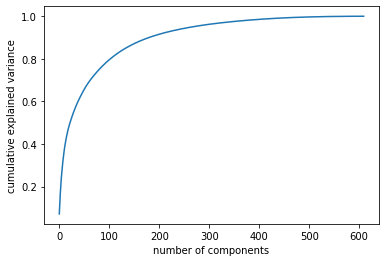

In [15]:
pca = sklearnPCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

The scree plot clearly indicates that the first 500 principal components contain the maximum information (variance) within the data. Note that the initial data set had approximately 9000 features which can now be narrowed down to just 500. Thus, you can now easily perform further analysis on the data since the redundant or insignificant variables are out. This is the power of dimensionality reduction.

In [16]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df

In [17]:
pca = sklearnPCA(n_components=220)
pca.fit_transform(df1)

# Call function to create importance df
importance_df  = create_importance_dataframe(pca, df1)

# Show first few rows
display(importance_df.head())

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 features are \n')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 features are \n')
display(pc2_top_10_features )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC211,PC212,PC213,PC214,PC215,PC216,PC217,PC218,PC219,PC220
movieId,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.001603,0.003215,0.001204,0.001673,0.006684,0.004361,0.001214,0.005930,0.007992,0.002449,...,0.000202,0.000088,0.000910,0.001209,0.000429,0.000615,0.000233,0.000169,0.000427,0.001415
'Hellboy': The Seeds of Creation (2004),0.000393,0.000242,0.000984,0.001328,0.001324,0.000950,0.000002,0.000556,0.000562,0.000260,...,0.004711,0.002744,0.003621,0.005495,0.002250,0.003716,0.004216,0.002898,0.002897,0.005740
'Round Midnight (1986),0.000201,0.000043,0.001209,0.001017,0.000460,0.000236,0.000226,0.000192,0.001046,0.000043,...,0.005740,0.006239,0.000591,0.000122,0.004226,0.006540,0.002949,0.009395,0.003830,0.007990
'Salem's Lot (2004),0.000300,0.000163,0.000513,0.000432,0.000782,0.000921,0.000343,0.000382,0.000526,0.000175,...,0.003819,0.008182,0.005492,0.009328,0.006378,0.014208,0.001935,0.016380,0.011847,0.004142
'Til There Was You (1997),0.000399,0.000564,0.001113,0.001127,0.001060,0.001008,0.000228,0.000662,0.000185,0.000625,...,0.001587,0.001461,0.008420,0.015469,0.001189,0.016846,0.004102,0.021160,0.011494,0.003574



PC1 top 10 features are 



movieId
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.073747
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.068983
Star Wars: Episode IV - A New Hope (1977)                                         0.066471
Matrix, The (1999)                                                                0.065993
Fight Club (1999)                                                                 0.065047
Monty Python and the Holy Grail (1975)                                            0.064780
Back to the Future (1985)                                                         0.064016
Groundhog Day (1993)                                                              0.063803
Reservoir Dogs (1992)                                                             0.063461
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.063109
Name: PC1, dtype: float64


PC2 top 10 features are 



movieId
Inception (2010)                                         0.102564
Dark Knight, The (2008)                                  0.100088
Up (2009)                                                0.080602
Lord of the Rings: The Return of the King, The (2003)    0.076778
Iron Man (2008)                                          0.073136
WALL·E (2008)                                            0.072152
Avatar (2009)                                            0.069865
Inglourious Basterds (2009)                              0.069803
Lord of the Rings: The Two Towers, The (2002)            0.069361
Dark Knight Rises, The (2012)                            0.068383
Name: PC2, dtype: float64

In [18]:
for column in importance_df:
   columnSeriesObj = importance_df[column]
   pc_top_10_features = columnSeriesObj.sort_values(ascending = False)[:10]
   print(), print(column + ' Top 10 features are \n')
   display(pc_top_10_features )


PC1 Top 10 features are 



movieId
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.073747
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.068983
Star Wars: Episode IV - A New Hope (1977)                                         0.066471
Matrix, The (1999)                                                                0.065993
Fight Club (1999)                                                                 0.065047
Monty Python and the Holy Grail (1975)                                            0.064780
Back to the Future (1985)                                                         0.064016
Groundhog Day (1993)                                                              0.063803
Reservoir Dogs (1992)                                                             0.063461
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.063109
Name: PC1, dtype: float64


PC2 Top 10 features are 



movieId
Inception (2010)                                         0.102564
Dark Knight, The (2008)                                  0.100088
Up (2009)                                                0.080602
Lord of the Rings: The Return of the King, The (2003)    0.076778
Iron Man (2008)                                          0.073136
WALL·E (2008)                                            0.072152
Avatar (2009)                                            0.069865
Inglourious Basterds (2009)                              0.069803
Lord of the Rings: The Two Towers, The (2002)            0.069361
Dark Knight Rises, The (2012)                            0.068383
Name: PC2, dtype: float64


PC3 Top 10 features are 



movieId
Aladdin (1992)                       0.127149
True Lies (1994)                     0.123657
Lion King, The (1994)                0.123202
Die Hard: With a Vengeance (1995)    0.122702
Fugitive, The (1993)                 0.112649
Jurassic Park (1993)                 0.111272
Apollo 13 (1995)                     0.107649
Speed (1994)                         0.104384
Beauty and the Beast (1991)          0.101210
Batman (1989)                        0.098976
Name: PC3, dtype: float64


PC4 Top 10 features are 



movieId
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.118015
Matrix, The (1999)                                                                0.113222
Star Wars: Episode IV - A New Hope (1977)                                         0.110719
Saving Private Ryan (1998)                                                        0.105922
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.099337
Aliens (1986)                                                                     0.098774
Terminator 2: Judgment Day (1991)                                                 0.097383
Terminator, The (1984)                                                            0.095333
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.091275
Alien (1979)                                                                      0.090686
Name: PC4, dtype: float64


PC5 Top 10 features are 



movieId
Shrek (2001)                                                 0.113495
Finding Nemo (2003)                                          0.092570
Lord of the Rings: The Return of the King, The (2003)        0.089905
Beautiful Mind, A (2001)                                     0.089578
Lord of the Rings: The Two Towers, The (2002)                0.083581
Shawshank Redemption, The (1994)                             0.083009
Fight Club (1999)                                            0.082657
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.082300
Eternal Sunshine of the Spotless Mind (2004)                 0.081933
Forrest Gump (1994)                                          0.079656
Name: PC5, dtype: float64


PC6 Top 10 features are 



movieId
Pulp Fiction (1994)                 0.173916
Shawshank Redemption, The (1994)    0.149890
Braveheart (1995)                   0.128139
Seven (a.k.a. Se7en) (1995)         0.126163
Silence of the Lambs, The (1991)    0.126132
Usual Suspects, The (1995)          0.112955
Dances with Wolves (1990)           0.109081
Fugitive, The (1993)                0.105214
Schindler's List (1993)             0.099673
Firm, The (1993)                    0.098425
Name: PC6, dtype: float64


PC7 Top 10 features are 



movieId
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.088725
Forrest Gump (1994)                                                               0.076653
Back to the Future (1985)                                                         0.074267
Silence of the Lambs, The (1991)                                                  0.073037
Up (2009)                                                                         0.067651
Avengers, The (2012)                                                              0.066056
Toy Story (1995)                                                                  0.065700
Guardians of the Galaxy (2014)                                                    0.064463
Apollo 13 (1995)                                                                  0.063078
Sting, The (1973)                                                                 0.061382
Name: PC7, dtype: float64


PC8 Top 10 features are 



movieId
Matrix, The (1999)                                           0.103536
Saving Private Ryan (1998)                                   0.101570
Lord of the Rings: The Return of the King, The (2003)        0.085149
Gladiator (2000)                                             0.083610
Lord of the Rings: The Two Towers, The (2002)                0.080702
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.076526
Hunt for Red October, The (1990)                             0.071279
Nightmare Before Christmas, The (1993)                       0.070005
Star Wars: Episode VI - Return of the Jedi (1983)            0.066642
Bourne Identity, The (2002)                                  0.065649
Name: PC8, dtype: float64


PC9 Top 10 features are 



movieId
Good Will Hunting (1997)                                                0.086611
American Beauty (1999)                                                  0.084561
Forrest Gump (1994)                                                     0.078427
American Pie (1999)                                                     0.078243
Goodfellas (1990)                                                       0.063887
Social Network, The (2010)                                              0.061315
Spirited Away (Sen to Chihiro no kamikakushi) (2001)                    0.059830
When Harry Met Sally... (1989)                                          0.059796
Lord of the Rings: The Two Towers, The (2002)                           0.056721
Nausicaä of the Valley of the Wind (Kaze no tani no Naushika) (1984)    0.056201
Name: PC9, dtype: float64


PC10 Top 10 features are 



movieId
Departed, The (2006)                0.087826
Goodfellas (1990)                   0.087782
Shawshank Redemption, The (1994)    0.077870
Cool Hand Luke (1967)               0.076136
Chocolat (2000)                     0.062481
Fifth Element, The (1997)           0.062435
Godfather, The (1972)               0.061191
Moulin Rouge (2001)                 0.059174
This Is Spinal Tap (1984)           0.058600
Jaws (1975)                         0.057877
Name: PC10, dtype: float64


PC11 Top 10 features are 



movieId
Spirited Away (Sen to Chihiro no kamikakushi) (2001)         0.095311
Inception (2010)                                             0.075278
Nightmare Before Christmas, The (1993)                       0.074452
Dark Knight, The (2008)                                      0.074053
WALL·E (2008)                                                0.071508
My Neighbor Totoro (Tonari no Totoro) (1988)                 0.068647
Up (2009)                                                    0.066936
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.064597
Lord of the Rings: The Return of the King, The (2003)        0.063458
Princess Bride, The (1987)                                   0.059812
Name: PC11, dtype: float64


PC12 Top 10 features are 



movieId
Rear Window (1954)              0.071464
Schindler's List (1993)         0.065710
Psycho (1960)                   0.063995
It's a Wonderful Life (1946)    0.060858
Wizard of Oz, The (1939)        0.059656
To Kill a Mockingbird (1962)    0.058160
Remember the Titans (2000)      0.056516
North by Northwest (1959)       0.053873
Vertigo (1958)                  0.053565
Fight Club (1999)               0.049115
Name: PC12, dtype: float64


PC13 Top 10 features are 



movieId
One Flew Over the Cuckoo's Nest (1975)                                       0.080840
Princess Bride, The (1987)                                                   0.080768
Million Dollar Baby (2004)                                                   0.074768
There's Something About Mary (1998)                                          0.067289
Toy Story (1995)                                                             0.066032
Back to the Future (1985)                                                    0.065269
Groundhog Day (1993)                                                         0.064069
Star Wars: Episode VI - Return of the Jedi (1983)                            0.063448
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)    0.060671
Psycho (1960)                                                                0.059463
Name: PC13, dtype: float64


PC14 Top 10 features are 



movieId
Fight Club (1999)                            0.088524
Monty Python and the Holy Grail (1975)       0.074965
Monty Python's Life of Brian (1979)          0.073942
Chicken Run (2000)                           0.073714
Shining, The (1980)                          0.070970
American History X (1998)                    0.068550
Inception (2010)                             0.066484
Exorcist, The (1973)                         0.064861
Dark Knight, The (2008)                      0.059756
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.058188
Name: PC14, dtype: float64


PC15 Top 10 features are 



movieId
Lord of the Rings: The Two Towers, The (2002)                0.083180
Lord of the Rings: The Return of the King, The (2003)        0.082463
Incredibles, The (2004)                                      0.077971
Game, The (1997)                                             0.069897
Blade (1998)                                                 0.068867
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.067784
Finding Nemo (2003)                                          0.066499
Monsters, Inc. (2001)                                        0.055156
Men in Black (a.k.a. MIB) (1997)                             0.053759
Office Space (1999)                                          0.053594
Name: PC15, dtype: float64


PC16 Top 10 features are 



movieId
Contact (1997)                                             0.082402
Stand by Me (1986)                                         0.071881
Wallace & Gromit: The Wrong Trousers (1993)                0.071604
Terminator, The (1984)                                     0.070453
Memento (2000)                                             0.070370
L.A. Confidential (1997)                                   0.065016
Terminator 2: Judgment Day (1991)                          0.063128
Star Wars: Episode VI - Return of the Jedi (1983)          0.062733
Independence Day (a.k.a. ID4) (1996)                       0.062445
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.059657
Name: PC16, dtype: float64


PC17 Top 10 features are 



movieId
Fight Club (1999)                                0.063185
American Psycho (2000)                           0.061436
Heathers (1989)                                  0.056389
Batman (1989)                                    0.054936
Pulp Fiction (1994)                              0.053669
Terminator 2: Judgment Day (1991)                0.052160
Crash (2004)                                     0.050531
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    0.049921
Heat (1995)                                      0.048802
High Noon (1952)                                 0.048788
Name: PC17, dtype: float64


PC18 Top 10 features are 



movieId
Dark Knight, The (2008)                                      0.080941
Lord of the Rings: The Return of the King, The (2003)        0.080908
Lord of the Rings: The Two Towers, The (2002)                0.065341
Memento (2000)                                               0.062917
Bourne Ultimatum, The (2007)                                 0.060742
Batman Begins (2005)                                         0.060539
Fargo (1996)                                                 0.059530
King's Speech, The (2010)                                    0.059518
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.059058
Whole Nine Yards, The (2000)                                 0.057651
Name: PC18, dtype: float64


PC19 Top 10 features are 



movieId
Schindler's List (1993)                                                           0.111742
Star Wars: Episode IV - A New Hope (1977)                                         0.108816
Independence Day (a.k.a. ID4) (1996)                                              0.099080
Silence of the Lambs, The (1991)                                                  0.094206
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.091112
Rock, The (1996)                                                                  0.088314
Green Mile, The (1999)                                                            0.087560
Happy Gilmore (1996)                                                              0.081588
Mission: Impossible (1996)                                                        0.078297
Star Trek: First Contact (1996)                                                   0.075793
Name: PC19, dtype: float64


PC20 Top 10 features are 



movieId
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    0.075429
Schindler's List (1993)                                                        0.068427
Fantasia (1940)                                                                0.056003
It's a Wonderful Life (1946)                                                   0.055781
Godfather, The (1972)                                                          0.054854
Rain Man (1988)                                                                0.054798
Others, The (2001)                                                             0.054718
Usual Suspects, The (1995)                                                     0.053898
Hunt for Red October, The (1990)                                               0.049647
Shawshank Redemption, The (1994)                                               0.049419
Name: PC20, dtype: float64


PC21 Top 10 features are 



movieId
Toy Story (1995)                              0.114612
Fargo (1996)                                  0.110131
Star Wars: Episode IV - A New Hope (1977)     0.108608
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)     0.098722
Leaving Las Vegas (1995)                      0.098174
Dead Man Walking (1995)                       0.094582
Willy Wonka & the Chocolate Factory (1971)    0.090879
Eraser (1996)                                 0.087952
Usual Suspects, The (1995)                    0.086145
Twister (1996)                                0.085056
Name: PC21, dtype: float64


PC22 Top 10 features are 



movieId
Star Wars: Episode IV - A New Hope (1977)                0.092918
Godfather, The (1972)                                    0.084030
Star Wars: Episode V - The Empire Strikes Back (1980)    0.076053
Stand by Me (1986)                                       0.073437
Forrest Gump (1994)                                      0.072453
Star Wars: Episode VI - Return of the Jedi (1983)        0.069318
Godfather: Part II, The (1974)                           0.067052
Shrek (2001)                                             0.065925
Babe (1995)                                              0.065263
Sixth Sense, The (1999)                                  0.062433
Name: PC22, dtype: float64


PC23 Top 10 features are 



movieId
Toy Story (1995)                                         0.107723
As Good as It Gets (1997)                                0.080287
Star Wars: Episode IV - A New Hope (1977)                0.079938
American History X (1998)                                0.070598
Sixteen Candles (1984)                                   0.065200
Christmas Story, A (1983)                                0.065124
Star Wars: Episode V - The Empire Strikes Back (1980)    0.064862
My Cousin Vinny (1992)                                   0.064357
Star Wars: Episode VI - Return of the Jedi (1983)        0.062435
Indiana Jones and the Last Crusade (1989)                0.062112
Name: PC23, dtype: float64


PC24 Top 10 features are 



movieId
American Beauty (1999)                                     0.104341
Matrix, The (1999)                                         0.096020
Dead Man Walking (1995)                                    0.087681
Birdcage, The (1996)                                       0.084201
Gladiator (2000)                                           0.083539
South Park: Bigger, Longer and Uncut (1999)                0.077870
Leaving Las Vegas (1995)                                   0.075481
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.074734
Godfather, The (1972)                                      0.068366
Willy Wonka & the Chocolate Factory (1971)                 0.066794
Name: PC24, dtype: float64


PC25 Top 10 features are 



movieId
Shawshank Redemption, The (1994)                           0.152611
Willy Wonka & the Chocolate Factory (1971)                 0.100695
Schindler's List (1993)                                    0.086906
Independence Day (a.k.a. ID4) (1996)                       0.084977
Catch Me If You Can (2002)                                 0.084358
Mary Poppins (1964)                                        0.081206
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.079534
Wizard of Oz, The (1939)                                   0.075697
Mission: Impossible (1996)                                 0.074716
Sound of Music, The (1965)                                 0.071992
Name: PC25, dtype: float64


PC26 Top 10 features are 



movieId
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.075343
Life Is Beautiful (La Vita è bella) (1997)              0.074847
Juno (2007)                                             0.068147
Hellboy II: The Golden Army (2008)                      0.067353
Some Like It Hot (1959)                                 0.066650
Four Weddings and a Funeral (1994)                      0.066423
Goodfellas (1990)                                       0.065663
E.T. the Extra-Terrestrial (1982)                       0.064858
Schindler's List (1993)                                 0.062590
Slumdog Millionaire (2008)                              0.062114
Name: PC26, dtype: float64


PC27 Top 10 features are 



movieId
Princess Bride, The (1987)                 0.099453
Silence of the Lambs, The (1991)           0.094017
Schindler's List (1993)                    0.089158
Taxi Driver (1976)                         0.085683
Heat (1995)                                0.082858
Psycho (1960)                              0.076415
Alien (1979)                               0.074370
X-Men (2000)                               0.074088
Sixth Sense, The (1999)                    0.072794
First Blood (Rambo: First Blood) (1982)    0.067018
Name: PC27, dtype: float64


PC28 Top 10 features are 



movieId
Apocalypse Now (1979)                   0.084661
Aliens (1986)                           0.077246
Mission: Impossible (1996)              0.076769
Road Warrior, The (Mad Max 2) (1981)    0.073860
Reservoir Dogs (1992)                   0.066379
My Cousin Vinny (1992)                  0.065630
Rear Window (1954)                      0.065414
Vertigo (1958)                          0.064588
Beautiful Mind, A (2001)                0.064090
Braveheart (1995)                       0.063585
Name: PC28, dtype: float64


PC29 Top 10 features are 



movieId
Schindler's List (1993)                                                      0.080621
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)    0.073979
Memento (2000)                                                               0.070655
Breakfast Club, The (1985)                                                   0.069724
Royal Tenenbaums, The (2001)                                                 0.067053
Braveheart (1995)                                                            0.065421
Batman (1989)                                                                0.063960
Airplane! (1980)                                                             0.063609
Star Trek (2009)                                                             0.063592
District 9 (2009)                                                            0.062993
Name: PC29, dtype: float64


PC30 Top 10 features are 



movieId
Departed, The (2006)                                         0.088502
Lord of the Rings: The Return of the King, The (2003)        0.086752
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.085239
Lord of the Rings: The Two Towers, The (2002)                0.081698
In Bruges (2008)                                             0.078028
Monsters, Inc. (2001)                                        0.078021
Green Mile, The (1999)                                       0.076665
Zoolander (2001)                                             0.073744
Shrek (2001)                                                 0.072100
Anchorman: The Legend of Ron Burgundy (2004)                 0.067658
Name: PC30, dtype: float64


PC31 Top 10 features are 



movieId
Forrest Gump (1994)                                                               0.079356
Stand by Me (1986)                                                                0.075338
Die Hard (1988)                                                                   0.072314
Back to the Future (1985)                                                         0.070173
Die Hard 2 (1990)                                                                 0.069297
Big Lebowski, The (1998)                                                          0.068224
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.063629
Being John Malkovich (1999)                                                       0.061917
Chicken Run (2000)                                                                0.059033
Mars Attacks! (1996)                                                              0.057505
Name: PC31, dtype: float64


PC32 Top 10 features are 



movieId
Toy Story (1995)                        0.108898
Shawshank Redemption, The (1994)        0.098941
Independence Day (a.k.a. ID4) (1996)    0.096650
Birdcage, The (1996)                    0.087478
Mission: Impossible (1996)              0.086175
Beauty and the Beast (1991)             0.079248
Silence of the Lambs, The (1991)        0.074871
Twister (1996)                          0.074285
Forrest Gump (1994)                     0.071172
Tombstone (1993)                        0.071009
Name: PC32, dtype: float64


PC33 Top 10 features are 



movieId
Silence of the Lambs, The (1991)              0.091279
Life Is Beautiful (La Vita è bella) (1997)    0.090264
Big Lebowski, The (1998)                      0.088990
Schindler's List (1993)                       0.086326
Forrest Gump (1994)                           0.074971
WALL·E (2008)                                 0.074246
Inception (2010)                              0.073015
Matrix, The (1999)                            0.067896
Untouchables, The (1987)                      0.066325
Star Wars: Episode IV - A New Hope (1977)     0.065940
Name: PC33, dtype: float64


PC34 Top 10 features are 



movieId
Schindler's List (1993)                      0.113707
Saving Private Ryan (1998)                   0.100421
Blade Runner (1982)                          0.095081
Bourne Ultimatum, The (2007)                 0.084100
Contact (1997)                               0.079206
Bourne Supremacy, The (2004)                 0.079182
Star Trek II: The Wrath of Khan (1982)       0.077969
Star Trek: First Contact (1996)              0.073875
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.072391
Donnie Darko (2001)                          0.070604
Name: PC34, dtype: float64


PC35 Top 10 features are 



movieId
Finding Nemo (2003)                                                               0.106654
Sixth Sense, The (1999)                                                           0.102672
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.101356
Memento (2000)                                                                    0.072914
Indiana Jones and the Last Crusade (1989)                                         0.071653
Cool Hand Luke (1967)                                                             0.071413
Star Wars: Episode IV - A New Hope (1977)                                         0.069860
Karate Kid, The (1984)                                                            0.069050
Jungle Book, The (1967)                                                           0.068779
Taxi Driver (1976)                                                                0.066489
Name: PC35, dtype: float64


PC36 Top 10 features are 



movieId
As Good as It Gets (1997)              0.080522
Schindler's List (1993)                0.080511
There's Something About Mary (1998)    0.078247
2001: A Space Odyssey (1968)           0.078121
Kill Bill: Vol. 2 (2004)               0.074874
Blade Runner (1982)                    0.072260
Slumdog Millionaire (2008)             0.071786
Children of Men (2006)                 0.069010
Casino Royale (2006)                   0.065978
Casino (1995)                          0.065934
Name: PC36, dtype: float64


PC37 Top 10 features are 



movieId
Star Wars: Episode IV - A New Hope (1977)                    0.118581
Monty Python's Life of Brian (1979)                          0.102468
Eternal Sunshine of the Spotless Mind (2004)                 0.088435
Star Wars: Episode V - The Empire Strikes Back (1980)        0.077987
Groundhog Day (1993)                                         0.077038
Star Wars: Episode VI - Return of the Jedi (1983)            0.076897
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.073292
Pulp Fiction (1994)                                          0.070880
Top Gun (1986)                                               0.070352
Leaving Las Vegas (1995)                                     0.069414
Name: PC37, dtype: float64


PC38 Top 10 features are 



movieId
Shawshank Redemption, The (1994)                                               0.106559
Star Wars: Episode V - The Empire Strikes Back (1980)                          0.103346
Schindler's List (1993)                                                        0.095424
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)                           0.093716
Good Will Hunting (1997)                                                       0.085987
Independence Day (a.k.a. ID4) (1996)                                           0.079608
Nightmare Before Christmas, The (1993)                                         0.079374
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    0.077957
Field of Dreams (1989)                                                         0.077956
Star Wars: Episode IV - A New Hope (1977)                                      0.072085
Name: PC38, dtype: float64


PC39 Top 10 features are 



movieId
Rocky (1976)                                                 0.095478
Lord of the Rings: The Return of the King, The (2003)        0.088408
E.T. the Extra-Terrestrial (1982)                            0.077284
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.076899
The Imitation Game (2014)                                    0.076417
Lord of the Rings: The Two Towers, The (2002)                0.074808
Minority Report (2002)                                       0.070008
Clockwork Orange, A (1971)                                   0.069616
Lock, Stock & Two Smoking Barrels (1998)                     0.068279
Monty Python and the Holy Grail (1975)                       0.067704
Name: PC39, dtype: float64


PC40 Top 10 features are 



movieId
Godfather, The (1972)             0.090531
Casino Royale (2006)              0.086187
Office Space (1999)               0.080786
Tootsie (1982)                    0.079224
Clockwork Orange, A (1971)        0.078259
Finding Nemo (2003)               0.078156
Kiss Kiss Bang Bang (2005)        0.077059
Lost in Translation (2003)        0.076914
Saving Private Ryan (1998)        0.076552
Godfather: Part II, The (1974)    0.075083
Name: PC40, dtype: float64


PC41 Top 10 features are 



movieId
Shawshank Redemption, The (1994)              0.103790
Star Wars: Episode IV - A New Hope (1977)     0.088785
Babe (1995)                                   0.085417
Terminator 2: Judgment Day (1991)             0.082039
Dark Knight, The (2008)                       0.081459
Matrix, The (1999)                            0.081088
Blues Brothers, The (1980)                    0.079105
Life Is Beautiful (La Vita è bella) (1997)    0.077766
Apollo 13 (1995)                              0.077162
Aliens (1986)                                 0.076428
Name: PC41, dtype: float64


PC42 Top 10 features are 



movieId
Gattaca (1997)                                           0.089063
Good Will Hunting (1997)                                 0.087651
Lord of the Rings: The Return of the King, The (2003)    0.084945
Truman Show, The (1998)                                  0.084141
Star Wars: Episode V - The Empire Strikes Back (1980)    0.082426
Star Wars: Episode IV - A New Hope (1977)                0.081200
Aladdin (1992)                                           0.080873
Lord of the Rings: The Two Towers, The (2002)            0.071030
Shaun of the Dead (2004)                                 0.067960
Blazing Saddles (1974)                                   0.067777
Name: PC42, dtype: float64


PC43 Top 10 features are 



movieId
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.111686
Star Wars: Episode VI - Return of the Jedi (1983)            0.096146
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                    0.084851
Lord of the Rings: The Two Towers, The (2002)                0.077786
Run Lola Run (Lola rennt) (1998)                             0.075417
Lord of the Rings: The Return of the King, The (2003)        0.075375
True Romance (1993)                                          0.072055
Requiem for a Dream (2000)                                   0.071587
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)         0.070105
Godfather, The (1972)                                        0.070006
Name: PC43, dtype: float64


PC44 Top 10 features are 



movieId
Lord of the Rings: The Fellowship of the Ring, The (2001)                                     0.101417
Lord of the Rings: The Two Towers, The (2002)                                                 0.099666
WALL·E (2008)                                                                                 0.096071
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)                0.095714
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)                                0.089077
Lord of the Rings: The Return of the King, The (2003)                                         0.085089
Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan (2006)    0.081804
Groundhog Day (1993)                                                                          0.077665
I Am Legend (2007)                                                                            0.076022
Avatar (2009)                                                    


PC45 Top 10 features are 



movieId
Silence of the Lambs, The (1991)    0.093543
Rock, The (1996)                    0.083857
American Pie (1999)                 0.077089
Almost Famous (2000)                0.075830
Monsters, Inc. (2001)               0.075640
True Romance (1993)                 0.073485
Wayne's World (1992)                0.073072
2001: A Space Odyssey (1968)        0.072286
Godfather, The (1972)               0.069942
Fight Club (1999)                   0.069878
Name: PC45, dtype: float64


PC46 Top 10 features are 



movieId
Monty Python's Life of Brian (1979)             0.122068
Godfather, The (1972)                           0.090072
Forrest Gump (1994)                             0.083668
American Pie (1999)                             0.080730
Austin Powers: The Spy Who Shagged Me (1999)    0.076949
Die Hard (1988)                                 0.076239
Game, The (1997)                                0.073299
Mission: Impossible (1996)                      0.072025
Bonnie and Clyde (1967)                         0.071510
American Beauty (1999)                          0.071498
Name: PC46, dtype: float64


PC47 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)                    0.103593
Terminator, The (1984)                               0.094119
Back to the Future (1985)                            0.088308
What's Eating Gilbert Grape (1993)                   0.080124
The Butterfly Effect (2004)                          0.077580
Clerks (1994)                                        0.072698
Braveheart (1995)                                    0.072484
Watchmen (2009)                                      0.069386
Enemy of the State (1998)                            0.066058
Star Wars: Episode VI - Return of the Jedi (1983)    0.065344
Name: PC47, dtype: float64


PC48 Top 10 features are 



movieId
Jurassic Park (1993)                                    0.117854
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.088785
There's Something About Mary (1998)                     0.088176
Truman Show, The (1998)                                 0.087570
Terminator 2: Judgment Day (1991)                       0.086492
Toy Story (1995)                                        0.085047
City of God (Cidade de Deus) (2002)                     0.085011
Clerks (1994)                                           0.081943
Rear Window (1954)                                      0.071134
Natural Born Killers (1994)                             0.066402
Name: PC48, dtype: float64


PC49 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)    0.126122
American Beauty (1999)               0.120276
Braveheart (1995)                    0.104491
Speed (1994)                         0.095973
Clerks (1994)                        0.073499
Mission: Impossible (1996)           0.070811
Children of Men (2006)               0.069017
Waterworld (1995)                    0.068111
Airplane! (1980)                     0.067704
Good Morning, Vietnam (1987)         0.066824
Name: PC49, dtype: float64


PC50 Top 10 features are 



movieId
Silence of the Lambs, The (1991)          0.095566
Aliens (1986)                             0.091867
Pulp Fiction (1994)                       0.087324
Clerks (1994)                             0.083084
Finding Nemo (2003)                       0.080684
Star Trek: First Contact (1996)           0.074011
Meet the Parents (2000)                   0.073855
American Beauty (1999)                    0.072309
One Flew Over the Cuckoo's Nest (1975)    0.069835
Alien (1979)                              0.068400
Name: PC50, dtype: float64


PC51 Top 10 features are 



movieId
Pulp Fiction (1994)                           0.108614
Few Good Men, A (1992)                        0.095356
Godfather: Part II, The (1974)                0.079341
Apocalypse Now (1979)                         0.078987
Godfather, The (1972)                         0.078689
Silence of the Lambs, The (1991)              0.077973
Schindler's List (1993)                       0.066683
Big (1988)                                    0.065948
Life Is Beautiful (La Vita è bella) (1997)    0.064803
City Slickers (1991)                          0.064571
Name: PC51, dtype: float64


PC52 Top 10 features are 



movieId
Shawshank Redemption, The (1994)    0.130252
Seven (a.k.a. Se7en) (1995)         0.092358
Citizen Kane (1941)                 0.088554
Pretty Woman (1990)                 0.083674
Alien (1979)                        0.082379
Star Trek: First Contact (1996)     0.082311
Airplane! (1980)                    0.079456
Apollo 13 (1995)                    0.076904
Game, The (1997)                    0.075968
The Machinist (2004)                0.075323
Name: PC52, dtype: float64


PC53 Top 10 features are 



movieId
Gladiator (2000)                                      0.115836
Shawshank Redemption, The (1994)                      0.091101
Godfather, The (1972)                                 0.080538
Bowling for Columbine (2002)                          0.076648
Howl's Moving Castle (Hauru no ugoku shiro) (2004)    0.073833
Rain Man (1988)                                       0.073201
Toy Story (1995)                                      0.072816
Usual Suspects, The (1995)                            0.068459
Willy Wonka & the Chocolate Factory (1971)            0.068289
Saving Private Ryan (1998)                            0.067041
Name: PC53, dtype: float64


PC54 Top 10 features are 



movieId
Toy Story (1995)                     0.115262
Toy Story 2 (1999)                   0.083518
Jackie Brown (1997)                  0.067842
Beauty and the Beast (1991)          0.066556
Lion King, The (1994)                0.066517
Lethal Weapon (1987)                 0.066227
Forrest Gump (1994)                  0.066089
Breakfast Club, The (1985)           0.062098
Natural Born Killers (1994)          0.061707
Untitled Spider-Man Reboot (2017)    0.061506
Name: PC54, dtype: float64


PC55 Top 10 features are 



movieId
Dances with Wolves (1990)                    0.112430
Schindler's List (1993)                      0.111814
Apocalypse Now (1979)                        0.090287
Jaws (1975)                                  0.088243
Fugitive, The (1993)                         0.088041
Monty Python's The Meaning of Life (1983)    0.084942
Shakespeare in Love (1998)                   0.081170
Heat (1995)                                  0.079586
Rain Man (1988)                              0.078940
O Brother, Where Art Thou? (2000)            0.073104
Name: PC55, dtype: float64


PC56 Top 10 features are 



movieId
Apollo 13 (1995)                               0.132917
Silence of the Lambs, The (1991)               0.112779
Pulp Fiction (1994)                            0.107724
2001: A Space Odyssey (1968)                   0.101792
Schindler's List (1993)                        0.099216
Wallace & Gromit: The Wrong Trousers (1993)    0.098401
Up (2009)                                      0.092884
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)      0.091532
Tombstone (1993)                               0.090572
Truman Show, The (1998)                        0.089350
Name: PC56, dtype: float64


PC57 Top 10 features are 



movieId
Galaxy Quest (1999)                                               0.093252
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.092276
Four Weddings and a Funeral (1994)                                0.091871
Last of the Mohicans, The (1992)                                  0.082122
Lawrence of Arabia (1962)                                         0.073523
Wizard of Oz, The (1939)                                          0.073464
Annie Hall (1977)                                                 0.072784
Shawshank Redemption, The (1994)                                  0.071773
Hunt for Red October, The (1990)                                  0.068678
Meet the Parents (2000)                                           0.068510
Name: PC57, dtype: float64


PC58 Top 10 features are 



movieId
Godfather, The (1972)                     0.112252
Seven (a.k.a. Se7en) (1995)               0.104555
City of God (Cidade de Deus) (2002)       0.095545
Toy Story 2 (1999)                        0.087041
Sleepless in Seattle (1993)               0.083602
Platoon (1986)                            0.083083
Titanic (1997)                            0.077487
Godfather: Part II, The (1974)            0.076886
Chicago (2002)                            0.076174
One Flew Over the Cuckoo's Nest (1975)    0.075397
Name: PC58, dtype: float64


PC59 Top 10 features are 



movieId
Bug's Life, A (1998)                         0.097096
Schindler's List (1993)                      0.089079
Breakfast Club, The (1985)                   0.080509
Silence of the Lambs, The (1991)             0.078472
Speed (1994)                                 0.077243
Die Hard (1988)                              0.074266
Being John Malkovich (1999)                  0.074190
O Brother, Where Art Thou? (2000)            0.070009
Waterworld (1995)                            0.070004
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.068957
Name: PC59, dtype: float64


PC60 Top 10 features are 



movieId
Apollo 13 (1995)                                                                  0.107076
Pulp Fiction (1994)                                                               0.096187
Seven (a.k.a. Se7en) (1995)                                                       0.093521
Office Space (1999)                                                               0.078601
Austin Powers: International Man of Mystery (1997)                                0.076037
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.075722
Shakespeare in Love (1998)                                                        0.072350
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)                              0.070613
Best in Show (2000)                                                               0.070340
Clerks (1994)                                                                     0.067778
Name: PC60, dtype: float64


PC61 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                                                  0.078699
Prestige, The (2006)                                                              0.077546
Insider, The (1999)                                                               0.074682
Trainspotting (1996)                                                              0.074590
Monty Python and the Holy Grail (1975)                                            0.074110
Titanic (1997)                                                                    0.072798
Fugitive, The (1993)                                                              0.070881
Mulholland Drive (2001)                                                           0.070728
Godfather: Part II, The (1974)                                                    0.069092
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.069071
Name: PC61, dtype: float64


PC62 Top 10 features are 



movieId
Memento (2000)                            0.093431
Godfather, The (1972)                     0.083349
Die Hard (1988)                           0.081697
One Flew Over the Cuckoo's Nest (1975)    0.081392
Back to the Future (1985)                 0.079449
Incredibles, The (2004)                   0.078095
Sixth Sense, The (1999)                   0.074435
Prestige, The (2006)                      0.073404
Mary Poppins (1964)                       0.071032
Billy Madison (1995)                      0.065329
Name: PC62, dtype: float64


PC63 Top 10 features are 



movieId
12 Angry Men (1957)                                      0.101186
Pulp Fiction (1994)                                      0.099298
Rain Man (1988)                                          0.097367
One Flew Over the Cuckoo's Nest (1975)                   0.091798
Fargo (1996)                                             0.087228
Star Wars: Episode V - The Empire Strikes Back (1980)    0.080002
Harry Potter and the Prisoner of Azkaban (2004)          0.077457
Fight Club (1999)                                        0.077138
Matrix, The (1999)                                       0.075852
Alien (1979)                                             0.074064
Name: PC63, dtype: float64


PC64 Top 10 features are 



movieId
Wallace & Gromit: The Wrong Trousers (1993)        0.092541
O Brother, Where Art Thou? (2000)                  0.088415
Star Wars: Episode IV - A New Hope (1977)          0.086982
When Harry Met Sally... (1989)                     0.082789
Wallace & Gromit: A Close Shave (1995)             0.081023
Graduate, The (1967)                               0.080664
Heat (1995)                                        0.078278
Grand Day Out with Wallace and Gromit, A (1989)    0.077841
Road to Perdition (2002)                           0.077565
Matrix Reloaded, The (2003)                        0.075805
Name: PC64, dtype: float64


PC65 Top 10 features are 



movieId
Shawshank Redemption, The (1994)                                  0.150564
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.117219
Dances with Wolves (1990)                                         0.116435
Toy Story (1995)                                                  0.105929
Terminator 2: Judgment Day (1991)                                 0.103389
Forrest Gump (1994)                                               0.096092
Star Wars: Episode V - The Empire Strikes Back (1980)             0.089577
2001: A Space Odyssey (1968)                                      0.089020
Sixth Sense, The (1999)                                           0.086456
Schindler's List (1993)                                           0.084336
Name: PC65, dtype: float64


PC66 Top 10 features are 



movieId
Dances with Wolves (1990)                                         0.110145
Braveheart (1995)                                                 0.098128
Harry Potter and the Order of the Phoenix (2007)                  0.089785
Lion King, The (1994)                                             0.089285
Jurassic Park (1993)                                              0.088263
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.084836
Die Hard (1988)                                                   0.083997
Stargate (1994)                                                   0.074643
Fargo (1996)                                                      0.074545
Dave (1993)                                                       0.072610
Name: PC66, dtype: float64


PC67 Top 10 features are 



movieId
Matrix, The (1999)                                                                                0.126158
Back to the Future (1985)                                                                         0.093020
Full Metal Jacket (1987)                                                                          0.083356
Happy Gilmore (1996)                                                                              0.079770
Blow (2001)                                                                                       0.077443
Ocean's Eleven (2001)                                                                             0.076618
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.075638
Toy Story (1995)                                                                                  0.074928
Aladdin (1992)                                                                                    0.073488
Harry Potter and the Deathly 


PC68 Top 10 features are 



movieId
Back to the Future (1985)                                    0.098838
Seven (a.k.a. Se7en) (1995)                                  0.091339
Godfather, The (1972)                                        0.090552
Spider-Man 2 (2004)                                          0.090076
Star Wars: Episode V - The Empire Strikes Back (1980)        0.086016
Iron Giant, The (1999)                                       0.078565
X-Men (2000)                                                 0.078324
Beautiful Mind, A (2001)                                     0.076689
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.073402
Forrest Gump (1994)                                          0.073190
Name: PC68, dtype: float64


PC69 Top 10 features are 



movieId
Forrest Gump (1994)          0.108555
Amadeus (1984)               0.089119
Airplane! (1980)             0.081862
Vertigo (1958)               0.079973
Fantasia (1940)              0.078995
Apocalypse Now (1979)        0.075396
Mean Girls (2004)            0.073600
Notting Hill (1999)          0.070801
Dead Poets Society (1989)    0.068751
Stargate (1994)              0.068327
Name: PC69, dtype: float64


PC70 Top 10 features are 



movieId
Lion King, The (1994)               0.099510
Hunt for Red October, The (1990)    0.093411
American Beauty (1999)              0.090321
Shawshank Redemption, The (1994)    0.081045
Usual Suspects, The (1995)          0.080966
Outbreak (1995)                     0.080886
Good Will Hunting (1997)            0.076281
Sixth Sense, The (1999)             0.075808
True Lies (1994)                    0.073739
Pretty Woman (1990)                 0.072742
Name: PC70, dtype: float64


PC71 Top 10 features are 



movieId
Ocean's Eleven (2001)                                 0.125061
Schindler's List (1993)                               0.120355
Toy Story (1995)                                      0.118674
Shawshank Redemption, The (1994)                      0.107956
Austin Powers: International Man of Mystery (1997)    0.089927
Pianist, The (2002)                                   0.083531
Silence of the Lambs, The (1991)                      0.077547
Good Will Hunting (1997)                              0.076676
Dark Knight, The (2008)                               0.075578
No Country for Old Men (2007)                         0.074699
Name: PC71, dtype: float64


PC72 Top 10 features are 



movieId
Dark Knight, The (2008)                       0.106873
Inception (2010)                              0.093657
Gladiator (2000)                              0.090828
Amadeus (1984)                                0.090737
Sixth Sense, The (1999)                       0.088407
Meet the Parents (2000)                       0.085857
Seven (a.k.a. Se7en) (1995)                   0.082763
Braveheart (1995)                             0.079325
Life Is Beautiful (La Vita è bella) (1997)    0.078463
Shawshank Redemption, The (1994)              0.077812
Name: PC72, dtype: float64


PC73 Top 10 features are 



movieId
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.100451
Snatch (2000)                                                0.084119
American Beauty (1999)                                       0.081224
Godfather: Part II, The (1974)                               0.081195
Princess Bride, The (1987)                                   0.080973
Indiana Jones and the Last Crusade (1989)                    0.079959
Minority Report (2002)                                       0.079598
Matrix Reloaded, The (2003)                                  0.078761
Goodfellas (1990)                                            0.078758
Die Hard (1988)                                              0.078753
Name: PC73, dtype: float64


PC74 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                                 0.108072
Full Metal Jacket (1987)                                         0.085301
My Best Friend's Wedding (1997)                                  0.079325
Blade Runner (1982)                                              0.078028
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.077630
Memento (2000)                                                   0.077049
Bourne Identity, The (2002)                                      0.075100
South Park: Bigger, Longer and Uncut (1999)                      0.072626
Lost World: Jurassic Park, The (1997)                            0.070257
Monsters, Inc. (2001)                                            0.069153
Name: PC74, dtype: float64


PC75 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                                  0.142700
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.114654
Forrest Gump (1994)                                               0.102421
Alien (1979)                                                      0.092002
Aladdin (1992)                                                    0.090567
Pulp Fiction (1994)                                               0.080498
While You Were Sleeping (1995)                                    0.079328
Life Is Beautiful (La Vita è bella) (1997)                        0.078960
Usual Suspects, The (1995)                                        0.076219
Godfather: Part III, The (1990)                                   0.074675
Name: PC75, dtype: float64


PC76 Top 10 features are 



movieId
Forrest Gump (1994)                             0.144304
Back to the Future (1985)                       0.095281
City of God (Cidade de Deus) (2002)             0.081877
Austin Powers: The Spy Who Shagged Me (1999)    0.081143
One Flew Over the Cuckoo's Nest (1975)          0.070438
Blade Runner (1982)                             0.069668
Aladdin (1992)                                  0.068119
Stand by Me (1986)                              0.065775
True Lies (1994)                                0.065397
Few Good Men, A (1992)                          0.065336
Name: PC76, dtype: float64


PC77 Top 10 features are 



movieId
Ed Wood (1994)                            0.095814
Princess Bride, The (1987)                0.090523
Godfather, The (1972)                     0.087494
Shrek (2001)                              0.084882
Erin Brockovich (2000)                    0.075849
Taxi Driver (1976)                        0.073977
Contact (1997)                            0.073710
Godfather: Part II, The (1974)            0.073396
Nightmare Before Christmas, The (1993)    0.072582
Mulholland Drive (2001)                   0.069401
Name: PC77, dtype: float64


PC78 Top 10 features are 



movieId
Casablanca (1942)                              0.110929
Silence of the Lambs, The (1991)               0.103310
Groundhog Day (1993)                           0.084929
Wallace & Gromit: A Close Shave (1995)         0.079012
Speed (1994)                                   0.078608
Hunt for Red October, The (1990)               0.072521
Star Wars: Episode IV - A New Hope (1977)      0.071746
Bridge on the River Kwai, The (1957)           0.069782
Wallace & Gromit: The Wrong Trousers (1993)    0.067694
Glory (1989)                                   0.066681
Name: PC78, dtype: float64


PC79 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                                                  0.110559
Shawshank Redemption, The (1994)                                                  0.109390
Amadeus (1984)                                                                    0.097744
Maverick (1994)                                                                   0.089789
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.073556
Lord of the Rings: The Two Towers, The (2002)                                     0.073300
Fifth Element, The (1997)                                                         0.072303
Big Lebowski, The (1998)                                                          0.072213
Net, The (1995)                                                                   0.071047
WALL·E (2008)                                                                     0.070138
Name: PC79, dtype: float64


PC80 Top 10 features are 



movieId
Usual Suspects, The (1995)                0.105560
L.A. Confidential (1997)                  0.095549
Star Trek II: The Wrath of Khan (1982)    0.092869
Saving Private Ryan (1998)                0.088661
Dogma (1999)                              0.081741
Blood Diamond (2006)                      0.078877
Beautiful Mind, A (2001)                  0.078255
Princess Bride, The (1987)                0.078164
Clueless (1995)                           0.075874
Clockwork Orange, A (1971)                0.073897
Name: PC80, dtype: float64


PC81 Top 10 features are 



movieId
American Beauty (1999)                                0.115708
Pulp Fiction (1994)                                   0.107513
Green Mile, The (1999)                                0.096706
Game, The (1997)                                      0.088172
Memento (2000)                                        0.086635
Snatch (2000)                                         0.079467
Casablanca (1942)                                     0.075371
Blues Brothers, The (1980)                            0.074385
Saving Private Ryan (1998)                            0.073794
Austin Powers: International Man of Mystery (1997)    0.071196
Name: PC81, dtype: float64


PC82 Top 10 features are 



movieId
Forrest Gump (1994)                                0.109668
Silence of the Lambs, The (1991)                   0.086082
Great Escape, The (1963)                           0.082652
Kill Bill: Vol. 1 (2003)                           0.078234
Harry Potter and the Prisoner of Azkaban (2004)    0.072868
Blade Runner (1982)                                0.072604
Apollo 13 (1995)                                   0.072236
Jurassic Park (1993)                               0.071719
Walk the Line (2005)                               0.068905
Love Actually (2003)                               0.068470
Name: PC82, dtype: float64


PC83 Top 10 features are 



movieId
Schindler's List (1993)                               0.115941
Groundhog Day (1993)                                  0.100891
Austin Powers: International Man of Mystery (1997)    0.100527
Back to the Future (1985)                             0.093153
Forrest Gump (1994)                                   0.091141
Aladdin (1992)                                        0.083116
Clerks (1994)                                         0.082049
Thomas Crown Affair, The (1999)                       0.077575
Seven Samurai (Shichinin no samurai) (1954)           0.075761
Dead Man Walking (1995)                               0.073440
Name: PC83, dtype: float64


PC84 Top 10 features are 



movieId
Finding Nemo (2003)                    0.095801
Shawshank Redemption, The (1994)       0.090370
X-Men (2000)                           0.083187
Requiem for a Dream (2000)             0.080450
There's Something About Mary (1998)    0.072867
Dead Poets Society (1989)              0.072760
Forrest Gump (1994)                    0.072319
Mulholland Drive (2001)                0.071647
Inside Man (2006)                      0.069234
Life of Pi (2012)                      0.068922
Name: PC84, dtype: float64


PC85 Top 10 features are 



movieId
Schindler's List (1993)                      0.126824
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.121521
Memento (2000)                               0.092725
True Lies (1994)                             0.088509
Nightmare Before Christmas, The (1993)       0.081244
Back to the Future (1985)                    0.079826
Matrix, The (1999)                           0.071359
American Beauty (1999)                       0.067254
Sleepless in Seattle (1993)                  0.066275
Million Dollar Baby (2004)                   0.066253
Name: PC85, dtype: float64


PC86 Top 10 features are 



movieId
Clockwork Orange, A (1971)                           0.094919
Clerks (1994)                                        0.087719
Matrix, The (1999)                                   0.086977
Jaws (1975)                                          0.085822
Usual Suspects, The (1995)                           0.083545
Beautiful Mind, A (2001)                             0.077683
Monty Python and the Holy Grail (1975)               0.073485
Star Wars: Episode VI - Return of the Jedi (1983)    0.068333
Hot Shots! Part Deux (1993)                          0.067214
Finding Nemo (2003)                                  0.062764
Name: PC86, dtype: float64


PC87 Top 10 features are 



movieId
Fugitive, The (1993)                                     0.110262
American Beauty (1999)                                   0.090730
Usual Suspects, The (1995)                               0.090296
Lord of the Rings: The Return of the King, The (2003)    0.082055
Little Miss Sunshine (2006)                              0.081756
Austin Powers: The Spy Who Shagged Me (1999)             0.081615
E.T. the Extra-Terrestrial (1982)                        0.078756
One Flew Over the Cuckoo's Nest (1975)                   0.077517
Ghost (1990)                                             0.075130
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)     0.072559
Name: PC87, dtype: float64


PC88 Top 10 features are 



movieId
Groundhog Day (1993)                      0.113620
Aliens (1986)                             0.091261
GoldenEye (1995)                          0.083843
Back to the Future (1985)                 0.083478
Shrek (2001)                              0.082754
Good Will Hunting (1997)                  0.082617
Aladdin (1992)                            0.076202
Monty Python and the Holy Grail (1975)    0.075637
2001: A Space Odyssey (1968)              0.072845
Maltese Falcon, The (1941)                0.072698
Name: PC88, dtype: float64


PC89 Top 10 features are 



movieId
Die Hard (1988)                                 0.116860
Fifth Element, The (1997)                       0.105159
Clockwork Orange, A (1971)                      0.089606
Lion King, The (1994)                           0.088009
American Beauty (1999)                          0.087777
Apollo 13 (1995)                                0.078436
Eternal Sunshine of the Spotless Mind (2004)    0.077043
Prestige, The (2006)                            0.075826
12 Angry Men (1957)                             0.074888
Willy Wonka & the Chocolate Factory (1971)      0.074490
Name: PC89, dtype: float64


PC90 Top 10 features are 



movieId
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.119511
Catch Me If You Can (2002)                                 0.097365
Braveheart (1995)                                          0.090880
Graduate, The (1967)                                       0.090239
Silence of the Lambs, The (1991)                           0.087874
Beautiful Mind, A (2001)                                   0.081580
Saving Private Ryan (1998)                                 0.078657
Young Frankenstein (1974)                                  0.076840
Galaxy Quest (1999)                                        0.076792
Gladiator (2000)                                           0.076605
Name: PC90, dtype: float64


PC91 Top 10 features are 



movieId
Gladiator (2000)                                             0.087365
Office Space (1999)                                          0.086399
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.083519
Traffic (2000)                                               0.082624
Jurassic Park (1993)                                         0.080954
Usual Suspects, The (1995)                                   0.077805
Shawshank Redemption, The (1994)                             0.077766
Forrest Gump (1994)                                          0.077549
One Flew Over the Cuckoo's Nest (1975)                       0.077139
Schindler's List (1993)                                      0.076406
Name: PC91, dtype: float64


PC92 Top 10 features are 



movieId
Shawshank Redemption, The (1994)          0.143040
One Flew Over the Cuckoo's Nest (1975)    0.095846
Ghost (1990)                              0.092495
Gladiator (2000)                          0.084106
Lost in Translation (2003)                0.078201
Amadeus (1984)                            0.070599
Jaws (1975)                               0.070190
Big Lebowski, The (1998)                  0.069546
Postman, The (Postino, Il) (1994)         0.069164
Little Mermaid, The (1989)                0.066584
Name: PC92, dtype: float64


PC93 Top 10 features are 



movieId
Godfather: Part II, The (1974)            0.098498
GoldenEye (1995)                          0.093691
Truman Show, The (1998)                   0.081517
X-Men (2000)                              0.076697
Monty Python and the Holy Grail (1975)    0.075808
Pulp Fiction (1994)                       0.073324
Stargate (1994)                           0.073124
X2: X-Men United (2003)                   0.070091
Wizard of Oz, The (1939)                  0.068719
Catch Me If You Can (2002)                0.068499
Name: PC93, dtype: float64


PC94 Top 10 features are 



movieId
One Flew Over the Cuckoo's Nest (1975)       0.121048
Usual Suspects, The (1995)                   0.091181
Fargo (1996)                                 0.090604
Army of Darkness (1993)                      0.084564
Roger & Me (1989)                            0.075302
Stand by Me (1986)                           0.074495
Indiana Jones and the Last Crusade (1989)    0.073729
Interstellar (2014)                          0.073679
American Beauty (1999)                       0.073064
Princess Mononoke (Mononoke-hime) (1997)     0.072186
Name: PC94, dtype: float64


PC95 Top 10 features are 



movieId
What's Eating Gilbert Grape (1993)                                                0.087765
Sherlock Holmes (2009)                                                            0.082507
WALL·E (2008)                                                                     0.082214
Godfather, The (1972)                                                             0.081521
Pulp Fiction (1994)                                                               0.078229
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.077361
Karate Kid, The (1984)                                                            0.074980
Young Frankenstein (1974)                                                         0.073218
Ratatouille (2007)                                                                0.072537
Goonies, The (1985)                                                               0.071374
Name: PC95, dtype: float64


PC96 Top 10 features are 



movieId
Forrest Gump (1994)                                          0.115613
One Flew Over the Cuckoo's Nest (1975)                       0.111203
Alien (1979)                                                 0.102610
Star Wars: Episode IV - A New Hope (1977)                    0.090603
Godfather, The (1972)                                        0.089794
Heat (1995)                                                  0.079761
Aladdin (1992)                                               0.076699
When Harry Met Sally... (1989)                               0.069788
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.066144
Lord of the Rings: The Two Towers, The (2002)                0.065749
Name: PC96, dtype: float64


PC97 Top 10 features are 



movieId
Donnie Darko (2001)                                      0.146167
Raising Arizona (1987)                                   0.106449
Clockwork Orange, A (1971)                               0.097670
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                0.092155
Seven (a.k.a. Se7en) (1995)                              0.087246
Blair Witch Project, The (1999)                          0.075940
Star Wars: Episode V - The Empire Strikes Back (1980)    0.073084
Batman Begins (2005)                                     0.072959
Pan's Labyrinth (Laberinto del fauno, El) (2006)         0.072644
American Beauty (1999)                                   0.071689
Name: PC97, dtype: float64


PC98 Top 10 features are 



movieId
Rock, The (1996)              0.099859
Schindler's List (1993)       0.095207
Godfather, The (1972)         0.086916
Memento (2000)                0.085681
Casino Royale (2006)          0.077479
Fight Club (1999)             0.077199
Beautiful Mind, A (2001)      0.075225
Goldfinger (1964)             0.073783
Taxi Driver (1976)            0.071974
Blues Brothers, The (1980)    0.069946
Name: PC98, dtype: float64


PC99 Top 10 features are 



movieId
Toy Story (1995)                          0.092729
Schindler's List (1993)                   0.092687
Silence of the Lambs, The (1991)          0.091795
Shawshank Redemption, The (1994)          0.089897
40-Year-Old Virgin, The (2005)            0.087728
V for Vendetta (2006)                     0.083599
Jumanji (1995)                            0.082217
Godfather, The (1972)                     0.077218
Fight Club (1999)                         0.076916
One Flew Over the Cuckoo's Nest (1975)    0.076848
Name: PC99, dtype: float64


PC100 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                                  0.113077
Reservoir Dogs (1992)                                             0.091582
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.088906
Four Weddings and a Funeral (1994)                                0.085320
Toy Story (1995)                                                  0.080026
Star Trek (2009)                                                  0.072537
Home Alone (1990)                                                 0.072056
One Flew Over the Cuckoo's Nest (1975)                            0.069974
Misery (1990)                                                     0.068818
Total Recall (1990)                                               0.068032
Name: PC100, dtype: float64


PC101 Top 10 features are 



movieId
Beautiful Mind, A (2001)            0.103356
Die Hard (1988)                     0.100778
Shawshank Redemption, The (1994)    0.100067
Aladdin (1992)                      0.092483
Schindler's List (1993)             0.091281
Charlie's Angels (2000)             0.079645
Spider-Man (2002)                   0.072572
Clockwork Orange, A (1971)          0.072031
Men in Black (a.k.a. MIB) (1997)    0.072012
Bruce Almighty (2003)               0.069703
Name: PC101, dtype: float64


PC102 Top 10 features are 



movieId
Pulp Fiction (1994)                          0.153546
Star Wars: Episode IV - A New Hope (1977)    0.088004
Goodfellas (1990)                            0.079182
Home Alone (1990)                            0.074280
Fifth Element, The (1997)                    0.073692
Ocean's Eleven (2001)                        0.073167
Rock, The (1996)                             0.070388
Black Hawk Down (2001)                       0.070350
True Lies (1994)                             0.068864
Payback (1999)                               0.066369
Name: PC102, dtype: float64


PC103 Top 10 features are 



movieId
Shawshank Redemption, The (1994)              0.133062
Sixth Sense, The (1999)                       0.109063
Willy Wonka & the Chocolate Factory (1971)    0.108001
Forrest Gump (1994)                           0.099201
Usual Suspects, The (1995)                    0.086859
Ghostbusters (a.k.a. Ghost Busters) (1984)    0.085062
Casablanca (1942)                             0.083023
Saving Private Ryan (1998)                    0.081566
Who Framed Roger Rabbit? (1988)               0.081293
Lion King, The (1994)                         0.079328
Name: PC103, dtype: float64


PC104 Top 10 features are 



movieId
Usual Suspects, The (1995)                                        0.152586
Braveheart (1995)                                                 0.127539
Forrest Gump (1994)                                               0.124341
L.A. Confidential (1997)                                          0.096975
Pulp Fiction (1994)                                               0.085820
WALL·E (2008)                                                     0.085064
Schindler's List (1993)                                           0.082811
Stand by Me (1986)                                                0.080654
Harry Potter and the Chamber of Secrets (2002)                    0.078776
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.076501
Name: PC104, dtype: float64


PC105 Top 10 features are 



movieId
Titanic (1997)                                         0.112693
WALL·E (2008)                                          0.085406
Stand by Me (1986)                                     0.085016
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)              0.082294
Dark Knight, The (2008)                                0.079387
Catch Me If You Can (2002)                             0.076936
Lion King, The (1994)                                  0.076215
Star Wars: Episode III - Revenge of the Sith (2005)    0.071477
Fargo (1996)                                           0.070420
Gladiator (2000)                                       0.070047
Name: PC105, dtype: float64


PC106 Top 10 features are 



movieId
Forrest Gump (1994)                             0.132168
Shawshank Redemption, The (1994)                0.115853
Pulp Fiction (1994)                             0.111248
Tombstone (1993)                                0.096059
Interstellar (2014)                             0.090276
X-Men (2000)                                    0.087779
Apollo 13 (1995)                                0.084141
Dead Poets Society (1989)                       0.084025
Eternal Sunshine of the Spotless Mind (2004)    0.083257
Blade Runner (1982)                             0.082102
Name: PC106, dtype: float64


PC107 Top 10 features are 



movieId
Willy Wonka & the Chocolate Factory (1971)    0.089714
Shawshank Redemption, The (1994)              0.084630
Silence of the Lambs, The (1991)              0.084206
Clueless (1995)                               0.082398
Four Weddings and a Funeral (1994)            0.079355
Terminator 2: Judgment Day (1991)             0.079240
In the Line of Fire (1993)                    0.078022
Godfather: Part III, The (1990)               0.070720
Beautiful Mind, A (2001)                      0.070266
Psycho (1960)                                 0.068035
Name: PC107, dtype: float64


PC108 Top 10 features are 



movieId
Matrix, The (1999)                                           0.136894
Schindler's List (1993)                                      0.131958
Life Is Beautiful (La Vita è bella) (1997)                   0.122522
Gladiator (2000)                                             0.107939
Saving Private Ryan (1998)                                   0.105368
American Beauty (1999)                                       0.091044
Godfather, The (1972)                                        0.089518
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.084769
Graduate, The (1967)                                         0.083638
Aliens (1986)                                                0.080345
Name: PC108, dtype: float64


PC109 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                        0.112779
12 Angry Men (1957)                                     0.097764
Truman Show, The (1998)                                 0.083227
One Flew Over the Cuckoo's Nest (1975)                  0.081720
Aliens (1986)                                           0.079655
Independence Day (a.k.a. ID4) (1996)                    0.076608
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.073251
Graduate, The (1967)                                    0.071497
Conspiracy Theory (1997)                                0.069723
Desperado (1995)                                        0.069053
Name: PC109, dtype: float64


PC110 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)                                                 0.110156
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)                    0.107549
Mission: Impossible (1996)                                                        0.099929
Princess Bride, The (1987)                                                        0.095108
Silence of the Lambs, The (1991)                                                  0.094984
Shrek (2001)                                                                      0.093962
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.086553
Sixth Sense, The (1999)                                                           0.085420
Aladdin (1992)                                                                    0.079126
Star Wars: Episode I - The Phantom Menace (1999)                                  0.076588
Name: PC110, dtype: float64


PC111 Top 10 features are 



movieId
Braveheart (1995)                            0.082031
Sting, The (1973)                            0.077330
Ghost (1990)                                 0.076039
To Kill a Mockingbird (1962)                 0.075222
Vertigo (1958)                               0.071163
Toy Story 2 (1999)                           0.069642
Usual Suspects, The (1995)                   0.069147
Monty Python's Life of Brian (1979)          0.068747
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.068369
Game, The (1997)                             0.068251
Name: PC111, dtype: float64


PC112 Top 10 features are 



movieId
Braveheart (1995)                                                                 0.129228
Toy Story (1995)                                                                  0.090965
Big Fish (2003)                                                                   0.086445
Indiana Jones and the Temple of Doom (1984)                                       0.085617
Green Mile, The (1999)                                                            0.083201
Blazing Saddles (1974)                                                            0.081321
Grease (1978)                                                                     0.080141
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.077282
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.075516
Inglourious Basterds (2009)                                                       0.075196
Name: PC112, dtype: float64


PC113 Top 10 features are 



movieId
Forrest Gump (1994)                       0.099528
Dark Knight, The (2008)                   0.093022
Jumanji (1995)                            0.088684
Bourne Identity, The (2002)               0.085548
In the Line of Fire (1993)                0.084618
One Flew Over the Cuckoo's Nest (1975)    0.080026
Four Weddings and a Funeral (1994)        0.078861
Batman Begins (2005)                      0.074160
Shawshank Redemption, The (1994)          0.073290
Sherlock Holmes (2009)                    0.071356
Name: PC113, dtype: float64


PC114 Top 10 features are 



movieId
Amadeus (1984)                                 0.109159
Wallace & Gromit: The Wrong Trousers (1993)    0.096567
Blazing Saddles (1974)                         0.094131
Gladiator (2000)                               0.087104
Wallace & Gromit: A Close Shave (1995)         0.084213
Heat (1995)                                    0.078849
Fight Club (1999)                              0.077362
Memento (2000)                                 0.075234
Dark Knight Rises, The (2012)                  0.072877
Stand by Me (1986)                             0.071081
Name: PC114, dtype: float64


PC115 Top 10 features are 



movieId
Usual Suspects, The (1995)                              0.114345
Run Lola Run (Lola rennt) (1998)                        0.104452
Princess Bride, The (1987)                              0.097660
Monty Python and the Holy Grail (1975)                  0.095186
Memento (2000)                                          0.093147
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.090350
Silence of the Lambs, The (1991)                        0.085083
Speed (1994)                                            0.080894
Braveheart (1995)                                       0.074805
Fight Club (1999)                                       0.072554
Name: PC115, dtype: float64


PC116 Top 10 features are 



movieId
American Beauty (1999)                                                            0.105586
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)                           0.092960
Incredibles, The (2004)                                                           0.091644
Departed, The (2006)                                                              0.091271
Shawshank Redemption, The (1994)                                                  0.089237
Gladiator (2000)                                                                  0.087119
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.083417
Good Will Hunting (1997)                                                          0.080161
Pianist, The (2002)                                                               0.079005
Usual Suspects, The (1995)                                                        0.078898
Name: PC116, dtype: float64


PC117 Top 10 features are 



movieId
Braveheart (1995)                             0.151578
The Martian (2015)                            0.075824
Life Is Beautiful (La Vita è bella) (1997)    0.073400
Good Morning, Vietnam (1987)                  0.073062
Hudsucker Proxy, The (1994)                   0.070156
Rob Roy (1995)                                0.070144
Pulp Fiction (1994)                           0.068865
Schindler's List (1993)                       0.068741
2001: A Space Odyssey (1968)                  0.068643
WALL·E (2008)                                 0.068560
Name: PC117, dtype: float64


PC118 Top 10 features are 



movieId
Matrix, The (1999)                            0.110025
Forrest Gump (1994)                           0.097021
Toy Story (1995)                              0.095770
Princess Bride, The (1987)                    0.092099
Good Will Hunting (1997)                      0.089645
Braveheart (1995)                             0.087512
Willy Wonka & the Chocolate Factory (1971)    0.084555
Finding Nemo (2003)                           0.083342
Sixth Sense, The (1999)                       0.083245
Schindler's List (1993)                       0.082728
Name: PC118, dtype: float64


PC119 Top 10 features are 



movieId
Schindler's List (1993)                       0.147696
Princess Bride, The (1987)                    0.117536
Usual Suspects, The (1995)                    0.091940
Silence of the Lambs, The (1991)              0.089415
Life Is Beautiful (La Vita è bella) (1997)    0.085457
Die Hard: With a Vengeance (1995)             0.084730
English Patient, The (1996)                   0.083487
L.A. Confidential (1997)                      0.078397
Requiem for a Dream (2000)                    0.076593
Jerry Maguire (1996)                          0.075694
Name: PC119, dtype: float64


PC120 Top 10 features are 



movieId
Saving Private Ryan (1998)                                   0.111216
Mrs. Doubtfire (1993)                                        0.099839
Game, The (1997)                                             0.091566
Aladdin (1992)                                               0.080556
Clear and Present Danger (1994)                              0.078609
Dances with Wolves (1990)                                    0.078422
As Good as It Gets (1997)                                    0.071527
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.070338
Stripes (1981)                                               0.069941
Cast Away (2000)                                             0.069025
Name: PC120, dtype: float64


PC121 Top 10 features are 



movieId
Matrix, The (1999)                                     0.112275
Shining, The (1980)                                    0.111932
Fugitive, The (1993)                                   0.107316
12 Angry Men (1957)                                    0.106477
Little Miss Sunshine (2006)                            0.096471
Sixth Sense, The (1999)                                0.084728
Kill Bill: Vol. 1 (2003)                               0.081566
Magnolia (1999)                                        0.077825
Schindler's List (1993)                                0.075246
Harry Potter and the Deathly Hallows: Part 2 (2011)    0.074019
Name: PC121, dtype: float64


PC122 Top 10 features are 



movieId
Babe (1995)                                     0.105415
Rock, The (1996)                                0.094449
One Flew Over the Cuckoo's Nest (1975)          0.092745
Toy Story (1995)                                0.083385
Taxi Driver (1976)                              0.077904
Willy Wonka & the Chocolate Factory (1971)      0.077334
Fight Club (1999)                               0.076755
Rear Window (1954)                              0.076406
Austin Powers: The Spy Who Shagged Me (1999)    0.075891
Election (1999)                                 0.075319
Name: PC122, dtype: float64


PC123 Top 10 features are 



movieId
There's Something About Mary (1998)                                               0.094337
Beautiful Mind, A (2001)                                                          0.091202
Apocalypse Now (1979)                                                             0.087334
Mrs. Doubtfire (1993)                                                             0.086721
12 Angry Men (1957)                                                               0.086706
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.086075
Snatch (2000)                                                                     0.084160
Schindler's List (1993)                                                           0.083515
Shakespeare in Love (1998)                                                        0.082612
Breakfast Club, The (1985)                                                        0.078606
Name: PC123, dtype: float64


PC124 Top 10 features are 



movieId
Toy Story (1995)                     0.124780
Memento (2000)                       0.096893
Big Lebowski, The (1998)             0.082015
Terminator 2: Judgment Day (1991)    0.080478
Goodfellas (1990)                    0.077861
Prestige, The (2006)                 0.074825
Tombstone (1993)                     0.071892
It's a Wonderful Life (1946)         0.071422
Dances with Wolves (1990)            0.070756
Mummy Returns, The (2001)            0.069141
Name: PC124, dtype: float64


PC125 Top 10 features are 



movieId
Alien (1979)                                    0.126595
Desperado (1995)                                0.088920
Clear and Present Danger (1994)                 0.085959
Jurassic Park (1993)                            0.083130
Usual Suspects, The (1995)                      0.082958
Eternal Sunshine of the Spotless Mind (2004)    0.070867
Anchorman: The Legend of Ron Burgundy (2004)    0.070327
Strangers on a Train (1951)                     0.070206
Pinocchio (1940)                                0.067931
Dark Knight Rises, The (2012)                   0.067036
Name: PC125, dtype: float64


PC126 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)                                0.178221
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.086899
Up (2009)                                                        0.086842
Jurassic Park (1993)                                             0.084943
Matrix Reloaded, The (2003)                                      0.080551
Saving Private Ryan (1998)                                       0.079571
Princess Bride, The (1987)                                       0.078141
Eternal Sunshine of the Spotless Mind (2004)                     0.075984
Young Frankenstein (1974)                                        0.074106
Star Wars: Episode V - The Empire Strikes Back (1980)            0.072910
Name: PC126, dtype: float64


PC127 Top 10 features are 



movieId
Forrest Gump (1994)                                               0.103914
Ghostbusters (a.k.a. Ghost Busters) (1984)                        0.082353
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.081975
Godfather, The (1972)                                             0.078420
Gattaca (1997)                                                    0.077160
Star Trek: Generations (1994)                                     0.077066
Outbreak (1995)                                                   0.073100
In the Line of Fire (1993)                                        0.072113
Toy Story (1995)                                                  0.071288
Crying Game, The (1992)                                           0.068349
Name: PC127, dtype: float64


PC128 Top 10 features are 



movieId
Saving Private Ryan (1998)                                        0.138709
Pulp Fiction (1994)                                               0.097105
Schindler's List (1993)                                           0.094748
One Flew Over the Cuckoo's Nest (1975)                            0.088485
Braveheart (1995)                                                 0.086752
Spirited Away (Sen to Chihiro no kamikakushi) (2001)              0.080347
Casablanca (1942)                                                 0.077392
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                         0.072699
Star Wars: Episode VI - Return of the Jedi (1983)                 0.072567
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.071044
Name: PC128, dtype: float64


PC129 Top 10 features are 



movieId
Groundhog Day (1993)                                    0.117529
Lost in Translation (2003)                              0.092024
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.091405
Die Hard (1988)                                         0.082961
Independence Day (a.k.a. ID4) (1996)                    0.082909
Traffic (2000)                                          0.078806
Die Hard: With a Vengeance (1995)                       0.075453
Beautiful Mind, A (2001)                                0.072239
King's Speech, The (2010)                               0.071431
Clerks (1994)                                           0.071001
Name: PC129, dtype: float64


PC130 Top 10 features are 



movieId
Lion King, The (1994)                                        0.102115
Shawshank Redemption, The (1994)                             0.101129
American Beauty (1999)                                       0.094843
Monsters, Inc. (2001)                                        0.089734
V for Vendetta (2006)                                        0.088094
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.087902
Lord of the Rings: The Return of the King, The (2003)        0.085486
Snatch (2000)                                                0.084985
Requiem for a Dream (2000)                                   0.079329
Rocky Horror Picture Show, The (1975)                        0.078031
Name: PC130, dtype: float64


PC131 Top 10 features are 



movieId
Forrest Gump (1994)                                     0.120444
Jerry Maguire (1996)                                    0.084132
Ghostbusters (a.k.a. Ghost Busters) (1984)              0.079295
Pulp Fiction (1994)                                     0.077631
Star Wars: Episode IV - A New Hope (1977)               0.075625
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.074768
Fargo (1996)                                            0.074729
Godfather, The (1972)                                   0.074725
When Harry Met Sally... (1989)                          0.074308
American Beauty (1999)                                  0.073898
Name: PC131, dtype: float64


PC132 Top 10 features are 



movieId
Clerks (1994)                       0.110692
Usual Suspects, The (1995)          0.107185
Reservoir Dogs (1992)               0.095390
Memento (2000)                      0.093703
Fight Club (1999)                   0.092602
Men in Black (a.k.a. MIB) (1997)    0.092443
Taxi Driver (1976)                  0.088381
Dark Knight, The (2008)             0.081968
Finding Nemo (2003)                 0.079278
Psycho (1960)                       0.074522
Name: PC132, dtype: float64


PC133 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)    0.121272
Jurassic Park (1993)                 0.104985
Truman Show, The (1998)              0.094334
Silence of the Lambs, The (1991)     0.088639
300 (2007)                           0.087494
Batman (1989)                        0.078390
Sound of Music, The (1965)           0.077336
Kill Bill: Vol. 1 (2003)             0.070087
Casino (1995)                        0.065205
Goodfellas (1990)                    0.065110
Name: PC133, dtype: float64


PC134 Top 10 features are 



movieId
Carlito's Way (1993)                                                                              0.101690
Shining, The (1980)                                                                               0.083930
American Beauty (1999)                                                                            0.081100
Bridge on the River Kwai, The (1957)                                                              0.075675
Batman Begins (2005)                                                                              0.075073
Airplane! (1980)                                                                                  0.073597
Apollo 13 (1995)                                                                                  0.072994
Being John Malkovich (1999)                                                                       0.072536
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.072053
Fugitive, The (1993)         


PC135 Top 10 features are 



movieId
Titanic (1997)                                               0.130188
Ocean's Eleven (2001)                                        0.102959
Silence of the Lambs, The (1991)                             0.098098
Life Is Beautiful (La Vita è bella) (1997)                   0.095832
Monsters, Inc. (2001)                                        0.092974
Good Will Hunting (1997)                                     0.076304
Incredibles, The (2004)                                      0.071540
Interview with the Vampire: The Vampire Chronicles (1994)    0.066925
Die Hard: With a Vengeance (1995)                            0.065572
Piano, The (1993)                                            0.064848
Name: PC135, dtype: float64


PC136 Top 10 features are 



movieId
Willy Wonka & the Chocolate Factory (1971)    0.111809
Gladiator (2000)                              0.109912
Aladdin (1992)                                0.099179
Blade Runner (1982)                           0.094431
It's a Wonderful Life (1946)                  0.090303
Schindler's List (1993)                       0.081035
Star Wars: Episode IV - A New Hope (1977)     0.075895
Run Lola Run (Lola rennt) (1998)              0.074058
Apollo 13 (1995)                              0.069108
My Best Friend's Wedding (1997)               0.068999
Name: PC136, dtype: float64


PC137 Top 10 features are 



movieId
Fight Club (1999)                                  0.139209
Seven (a.k.a. Se7en) (1995)                        0.110449
GoldenEye (1995)                                   0.093267
Harry Potter and the Prisoner of Azkaban (2004)    0.085946
Wallace & Gromit: The Wrong Trousers (1993)        0.076060
Alien (1979)                                       0.072971
Titanic (1997)                                     0.072819
Terminator 2: Judgment Day (1991)                  0.072040
Pi (1998)                                          0.071653
Truman Show, The (1998)                            0.070205
Name: PC137, dtype: float64


PC138 Top 10 features are 



movieId
Spirited Away (Sen to Chihiro no kamikakushi) (2001)             0.118865
Taxi Driver (1976)                                               0.118110
Fargo (1996)                                                     0.116365
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.104817
Gladiator (2000)                                                 0.094342
WALL·E (2008)                                                    0.089402
Dances with Wolves (1990)                                        0.088655
Fugitive, The (1993)                                             0.084559
Donnie Darko (2001)                                              0.074333
Silence of the Lambs, The (1991)                                 0.067894
Name: PC138, dtype: float64


PC139 Top 10 features are 



movieId
Apollo 13 (1995)                         0.110802
Groundhog Day (1993)                     0.100969
Princess Bride, The (1987)               0.097591
Usual Suspects, The (1995)               0.090291
Four Weddings and a Funeral (1994)       0.089338
Rocky Horror Picture Show, The (1975)    0.086695
Matrix, The (1999)                       0.082623
Mrs. Doubtfire (1993)                    0.072788
Reservoir Dogs (1992)                    0.072439
Being John Malkovich (1999)              0.071571
Name: PC139, dtype: float64


PC140 Top 10 features are 



movieId
Forrest Gump (1994)                                                               0.112450
Groundhog Day (1993)                                                              0.099740
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.097938
Usual Suspects, The (1995)                                                        0.095475
Matrix, The (1999)                                                                0.094610
Men in Black (a.k.a. MIB) (1997)                                                  0.091909
Raising Arizona (1987)                                                            0.084118
Ghostbusters (a.k.a. Ghost Busters) (1984)                                        0.081552
When Harry Met Sally... (1989)                                                    0.078885
American History X (1998)                                                         0.078391
Name: PC140, dtype: float64


PC141 Top 10 features are 



movieId
Schindler's List (1993)                                      0.100070
Lethal Weapon 2 (1989)                                       0.083472
Back to the Future Part III (1990)                           0.082103
Mission: Impossible (1996)                                   0.081717
Lion King, The (1994)                                        0.080299
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.079634
Blade Runner (1982)                                          0.078308
Star Wars: Episode VI - Return of the Jedi (1983)            0.076289
American Beauty (1999)                                       0.076246
Speed (1994)                                                 0.074557
Name: PC141, dtype: float64


PC142 Top 10 features are 



movieId
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)                           0.121497
Dark Knight, The (2008)                                                        0.109506
Beautiful Mind, A (2001)                                                       0.103328
Minority Report (2002)                                                         0.091787
Spirited Away (Sen to Chihiro no kamikakushi) (2001)                           0.091593
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    0.081683
American History X (1998)                                                      0.080780
Seven (a.k.a. Se7en) (1995)                                                    0.078238
Maltese Falcon, The (1941)                                                     0.075100
Mission: Impossible (1996)                                                     0.074335
Name: PC142, dtype: float64


PC143 Top 10 features are 



movieId
Life Is Beautiful (La Vita è bella) (1997)    0.112032
Star Wars: Episode IV - A New Hope (1977)     0.109458
Gattaca (1997)                                0.097531
Braveheart (1995)                             0.095379
American History X (1998)                     0.086229
Blues Brothers, The (1980)                    0.086174
Young Frankenstein (1974)                     0.082102
Toy Story (1995)                              0.081687
Patriot, The (2000)                           0.081646
Lady and the Tramp (1955)                     0.072925
Name: PC143, dtype: float64


PC144 Top 10 features are 



movieId
As Good as It Gets (1997)                            0.131175
Citizen Kane (1941)                                  0.116380
Breakfast Club, The (1985)                           0.080787
No Country for Old Men (2007)                        0.077372
How to Train Your Dragon (2010)                      0.076103
Beautiful Mind, A (2001)                             0.075360
Good Will Hunting (1997)                             0.074963
Demolition Man (1993)                                0.074239
GoldenEye (1995)                                     0.073568
Star Wars: Episode VI - Return of the Jedi (1983)    0.070889
Name: PC144, dtype: float64


PC145 Top 10 features are 



movieId
Fight Club (1999)                                                 0.117371
Prestige, The (2006)                                              0.098193
Catch Me If You Can (2002)                                        0.086376
Seven (a.k.a. Se7en) (1995)                                       0.078252
Cinema Paradiso (Nuovo cinema Paradiso) (1989)                    0.077339
Willy Wonka & the Chocolate Factory (1971)                        0.076701
X-Men (2000)                                                      0.076633
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.073814
Dances with Wolves (1990)                                         0.073726
October Sky (1999)                                                0.067340
Name: PC145, dtype: float64


PC146 Top 10 features are 



movieId
Apollo 13 (1995)                             0.114926
American Beauty (1999)                       0.086367
Annie Hall (1977)                            0.086046
Jurassic Park (1993)                         0.084281
Jumanji (1995)                               0.082677
Dark Knight, The (2008)                      0.081916
Shakespeare in Love (1998)                   0.081280
Rock, The (1996)                             0.081115
Star Wars: Episode IV - A New Hope (1977)    0.080527
Pulp Fiction (1994)                          0.079837
Name: PC146, dtype: float64


PC147 Top 10 features are 



movieId
Ice Age (2002)                  0.096910
Pulp Fiction (1994)             0.095614
Dark Knight, The (2008)         0.089875
Full Metal Jacket (1987)        0.081292
Firm, The (1993)                0.077671
Sting, The (1973)               0.077118
Bridget Jones's Diary (2001)    0.077067
Chocolat (2000)                 0.075550
Speed (1994)                    0.073750
Mrs. Doubtfire (1993)           0.071563
Name: PC147, dtype: float64


PC148 Top 10 features are 



movieId
Usual Suspects, The (1995)                    0.116715
Rain Man (1988)                               0.094675
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)     0.086443
Willy Wonka & the Chocolate Factory (1971)    0.082032
This Is Spinal Tap (1984)                     0.081309
Beetlejuice (1988)                            0.080995
Fugitive, The (1993)                          0.078627
Forrest Gump (1994)                           0.077553
Titanic (1997)                                0.076061
There's Something About Mary (1998)           0.075455
Name: PC148, dtype: float64


PC149 Top 10 features are 



movieId
Seven (a.k.a. Se7en) (1995)                                                       0.159092
Shawshank Redemption, The (1994)                                                  0.151080
American Beauty (1999)                                                            0.114498
Green Mile, The (1999)                                                            0.113011
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.102205
Beautiful Mind, A (2001)                                                          0.098807
Usual Suspects, The (1995)                                                        0.092272
There's Something About Mary (1998)                                               0.087102
Reservoir Dogs (1992)                                                             0.084628
Great Escape, The (1963)                                                          0.082923
Name: PC149, dtype: float64


PC150 Top 10 features are 



movieId
There's Something About Mary (1998)                                               0.141694
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.113238
Batman Begins (2005)                                                              0.112503
Aladdin (1992)                                                                    0.107178
Rear Window (1954)                                                                0.089737
X-Men (2000)                                                                      0.083120
Batman (1989)                                                                     0.081243
Die Hard (1988)                                                                   0.076997
Beautiful Mind, A (2001)                                                          0.076132
Social Network, The (2010)                                                        0.073120
Name: PC150, dtype: float64


PC151 Top 10 features are 



movieId
Good Will Hunting (1997)     0.111058
Apocalypse Now (1979)        0.106831
Godfather, The (1972)        0.101861
Fugitive, The (1993)         0.100845
Fifth Element, The (1997)    0.094373
Inception (2010)             0.094176
Die Hard (1988)              0.088891
Shining, The (1980)          0.086820
Leaving Las Vegas (1995)     0.084631
Twister (1996)               0.080781
Name: PC151, dtype: float64


PC152 Top 10 features are 



movieId
Speed (1994)                         0.114550
Terminator 2: Judgment Day (1991)    0.113855
Chicken Run (2000)                   0.096295
Terminator, The (1984)               0.095090
American Beauty (1999)               0.089196
Forrest Gump (1994)                  0.089088
Full Metal Jacket (1987)             0.082564
Roger & Me (1989)                    0.080165
X-Men (2000)                         0.076500
Kill Bill: Vol. 2 (2004)             0.070934
Name: PC152, dtype: float64


PC153 Top 10 features are 



movieId
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.094677
Aliens (1986)                                                     0.089796
Casino (1995)                                                     0.083620
Heat (1995)                                                       0.081003
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                         0.079912
Road Warrior, The (Mad Max 2) (1981)                              0.077910
Die Hard (1988)                                                   0.077692
X-Men (2000)                                                      0.073371
Men in Black (a.k.a. MIB) (1997)                                  0.072876
Spirited Away (Sen to Chihiro no kamikakushi) (2001)              0.072374
Name: PC153, dtype: float64


PC154 Top 10 features are 



movieId
American Beauty (1999)                       0.112324
Forrest Gump (1994)                          0.108739
Titanic (1997)                               0.106171
Indiana Jones and the Last Crusade (1989)    0.104027
Blade Runner (1982)                          0.102120
Sixth Sense, The (1999)                      0.096816
Abyss, The (1989)                            0.089560
Batman (1989)                                0.081824
One Flew Over the Cuckoo's Nest (1975)       0.074825
Intouchables (2011)                          0.072367
Name: PC154, dtype: float64


PC155 Top 10 features are 



movieId
Fargo (1996)                                 0.110575
Dave (1993)                                  0.109508
Shrek (2001)                                 0.100032
Indiana Jones and the Last Crusade (1989)    0.096593
Independence Day (a.k.a. ID4) (1996)         0.079366
Hunt for Red October, The (1990)             0.078620
Blazing Saddles (1974)                       0.077975
American Beauty (1999)                       0.077199
Gattaca (1997)                               0.076841
Three Kings (1999)                           0.075515
Name: PC155, dtype: float64


PC156 Top 10 features are 



movieId
Die Hard (1988)                0.128825
Forrest Gump (1994)            0.120816
Fugitive, The (1993)           0.112745
Seven (a.k.a. Se7en) (1995)    0.108879
Dances with Wolves (1990)      0.098928
Beach, The (2000)              0.090835
Dark Knight, The (2008)        0.078571
Apollo 13 (1995)               0.076935
Saving Private Ryan (1998)     0.075363
Mission: Impossible (1996)     0.074645
Name: PC156, dtype: float64


PC157 Top 10 features are 



movieId
O Brother, Where Art Thou? (2000)               0.100031
Monsters, Inc. (2001)                           0.092751
Donnie Darko (2001)                             0.091456
There's Something About Mary (1998)             0.082773
Iron Man (2008)                                 0.080204
The Martian (2015)                              0.073623
Legally Blonde (2001)                           0.070323
Good Will Hunting (1997)                        0.070095
Eternal Sunshine of the Spotless Mind (2004)    0.069726
Amadeus (1984)                                  0.069399
Name: PC157, dtype: float64


PC158 Top 10 features are 



movieId
Matrix, The (1999)                                         0.128315
Star Wars: Episode I - The Phantom Menace (1999)           0.098222
Good Will Hunting (1997)                                   0.097851
Shrek (2001)                                               0.095028
Green Mile, The (1999)                                     0.090938
Pulp Fiction (1994)                                        0.090323
E.T. the Extra-Terrestrial (1982)                          0.084788
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.080126
Toy Story (1995)                                           0.079494
Toy Story 2 (1999)                                         0.078592
Name: PC158, dtype: float64


PC159 Top 10 features are 



movieId
Tombstone (1993)                                                  0.092736
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.090243
Dark Knight, The (2008)                                           0.086865
Philadelphia (1993)                                               0.083524
Aladdin (1992)                                                    0.083165
Mummy, The (1999)                                                 0.080010
Requiem for a Dream (2000)                                        0.079532
Nightmare Before Christmas, The (1993)                            0.078638
Lion King, The (1994)                                             0.078109
Intouchables (2011)                                               0.074946
Name: PC159, dtype: float64


PC160 Top 10 features are 



movieId
L.A. Confidential (1997)            0.112785
Shawshank Redemption, The (1994)    0.110359
Fargo (1996)                        0.096197
Usual Suspects, The (1995)          0.085653
Dragonheart (1996)                  0.085500
Princess Bride, The (1987)          0.084768
Forrest Gump (1994)                 0.084580
GoldenEye (1995)                    0.081954
Goodfellas (1990)                   0.081711
Back to the Future (1985)           0.078239
Name: PC160, dtype: float64


PC161 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                    0.133407
Fight Club (1999)                                   0.100950
Casablanca (1942)                                   0.094416
Dances with Wolves (1990)                           0.090803
Godfather: Part II, The (1974)                      0.089017
Sixth Sense, The (1999)                             0.087246
Star Wars: Episode I - The Phantom Menace (1999)    0.085470
American Beauty (1999)                              0.083775
Avatar (2009)                                       0.083443
Glory (1989)                                        0.077766
Name: PC161, dtype: float64


PC162 Top 10 features are 



movieId
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)              0.159157
One Flew Over the Cuckoo's Nest (1975)                            0.117326
Shawshank Redemption, The (1994)                                  0.102598
Firm, The (1993)                                                  0.086878
Almost Famous (2000)                                              0.084349
Titanic (1997)                                                    0.082641
Star Wars: Episode V - The Empire Strikes Back (1980)             0.081349
Animal House (1978)                                               0.080436
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.079470
Happy Gilmore (1996)                                              0.077797
Name: PC162, dtype: float64


PC163 Top 10 features are 



movieId
Gladiator (2000)                                        0.110757
Beetlejuice (1988)                                      0.109296
City of God (Cidade de Deus) (2002)                     0.100911
Scream (1996)                                           0.090602
Batman Begins (2005)                                    0.088594
Back to the Future (1985)                               0.084610
Blazing Saddles (1974)                                  0.081129
Lawrence of Arabia (1962)                               0.077158
Spirited Away (Sen to Chihiro no kamikakushi) (2001)    0.076258
Shrek (2001)                                            0.075347
Name: PC163, dtype: float64


PC164 Top 10 features are 



movieId
Up (2009)                                                                         0.106839
Trainspotting (1996)                                                              0.098630
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.091807
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)                              0.090217
Fargo (1996)                                                                      0.083012
Kill Bill: Vol. 2 (2004)                                                          0.081890
Spirited Away (Sen to Chihiro no kamikakushi) (2001)                              0.079631
Rounders (1998)                                                                   0.079470
Full Metal Jacket (1987)                                                          0.079425
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.078941
Name: PC164, dtype: float64


PC165 Top 10 features are 



movieId
American President, The (1995)                  0.088509
Eternal Sunshine of the Spotless Mind (2004)    0.085911
Mask, The (1994)                                0.081580
Butch Cassidy and the Sundance Kid (1969)       0.080097
Beauty and the Beast (1991)                     0.076714
Seven (a.k.a. Se7en) (1995)                     0.073791
Emma (1996)                                     0.073746
Lock, Stock & Two Smoking Barrels (1998)        0.072153
Slumdog Millionaire (2008)                      0.071529
Army of Darkness (1993)                         0.069637
Name: PC165, dtype: float64


PC166 Top 10 features are 



movieId
Amadeus (1984)                   0.092098
Fight Club (1999)                0.084906
Donnie Darko (2001)              0.075759
Terminator, The (1984)           0.075697
Blazing Saddles (1974)           0.075455
Finding Nemo (2003)              0.074685
No Country for Old Men (2007)    0.073579
Godfather, The (1972)            0.073383
Annie Hall (1977)                0.067253
Dogma (1999)                     0.065505
Name: PC166, dtype: float64


PC167 Top 10 features are 



movieId
Lion King, The (1994)                        0.106708
One Flew Over the Cuckoo's Nest (1975)       0.104480
Seven (a.k.a. Se7en) (1995)                  0.086281
V for Vendetta (2006)                        0.082548
Good Will Hunting (1997)                     0.079966
District 9 (2009)                            0.072613
Blade Runner (1982)                          0.072509
Fugitive, The (1993)                         0.072063
Naked Gun 33 1/3: The Final Insult (1994)    0.069890
Young Frankenstein (1974)                    0.069136
Name: PC167, dtype: float64


PC168 Top 10 features are 



movieId
Mask, The (1994)                                                  0.095125
Shrek (2001)                                                      0.094916
Dances with Wolves (1990)                                         0.080824
Apollo 13 (1995)                                                  0.075570
Enemy of the State (1998)                                         0.074064
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.072621
Traffic (2000)                                                    0.071026
Good Will Hunting (1997)                                          0.068159
Rock, The (1996)                                                  0.067668
Snatch (2000)                                                     0.067208
Name: PC168, dtype: float64


PC169 Top 10 features are 



movieId
Bug's Life, A (1998)                                                              0.104251
American History X (1998)                                                         0.099838
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.098506
Pirates of the Caribbean: The Curse of the Black Pearl (2003)                     0.087802
Silence of the Lambs, The (1991)                                                  0.084544
Crimson Tide (1995)                                                               0.084474
Taxi Driver (1976)                                                                0.081859
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.081480
Ed Wood (1994)                                                                    0.074530
Prestige, The (2006)                                                              0.073541
Name: PC169, dtype: float64


PC170 Top 10 features are 



movieId
Memento (2000)                          0.103090
Up (2009)                               0.097833
Office Space (1999)                     0.095267
Clockwork Orange, A (1971)              0.083650
Toy Story (1995)                        0.081273
Die Hard (1988)                         0.077180
Amadeus (1984)                          0.077111
Independence Day (a.k.a. ID4) (1996)    0.076892
Back to the Future Part III (1990)      0.076260
Godfather: Part II, The (1974)          0.075369
Name: PC170, dtype: float64


PC171 Top 10 features are 



movieId
Forrest Gump (1994)                                                               0.100831
V for Vendetta (2006)                                                             0.093000
Back to the Future (1985)                                                         0.092718
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.083736
Ferris Bueller's Day Off (1986)                                                   0.082496
Wolf of Wall Street, The (2013)                                                   0.082484
American History X (1998)                                                         0.082056
Die Hard (1988)                                                                   0.080488
One Flew Over the Cuckoo's Nest (1975)                                            0.079475
Memento (2000)                                                                    0.073072
Name: PC171, dtype: float64


PC172 Top 10 features are 



movieId
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.110489
Fargo (1996)                                               0.102065
Ghostbusters (a.k.a. Ghost Busters) (1984)                 0.085833
Clerks (1994)                                              0.080174
Dead Poets Society (1989)                                  0.077172
Inception (2010)                                           0.073792
Graduate, The (1967)                                       0.073417
City of God (Cidade de Deus) (2002)                        0.072908
Star Wars: Episode VI - Return of the Jedi (1983)          0.072845
Shawshank Redemption, The (1994)                           0.072633
Name: PC172, dtype: float64


PC173 Top 10 features are 



movieId
Mission: Impossible (1996)                               0.108413
Mrs. Doubtfire (1993)                                    0.104702
2001: A Space Odyssey (1968)                             0.098232
Good Will Hunting (1997)                                 0.091146
Lord of the Rings: The Return of the King, The (2003)    0.071819
Stand by Me (1986)                                       0.070010
Bowling for Columbine (2002)                             0.068716
Edward Scissorhands (1990)                               0.064821
Pretty Woman (1990)                                      0.063160
Last Action Hero (1993)                                  0.063120
Name: PC173, dtype: float64


PC174 Top 10 features are 



movieId
Schindler's List (1993)            0.099883
While You Were Sleeping (1995)     0.085946
Blow (2001)                        0.083433
Saving Private Ryan (1998)         0.078843
Mrs. Doubtfire (1993)              0.078287
Sixth Sense, The (1999)            0.073520
Fugitive, The (1993)               0.073412
Much Ado About Nothing (1993)      0.071406
Zoolander (2001)                   0.069014
Wolf of Wall Street, The (2013)    0.068897
Name: PC174, dtype: float64


PC175 Top 10 features are 



movieId
Pianist, The (2002)                                 0.119222
Good Will Hunting (1997)                            0.098348
Terminator, The (1984)                              0.081948
American President, The (1995)                      0.081525
To Kill a Mockingbird (1962)                        0.080107
There Will Be Blood (2007)                          0.077307
Princess Bride, The (1987)                          0.075910
Pan's Labyrinth (Laberinto del fauno, El) (2006)    0.075468
Back to the Future (1985)                           0.075114
Prestige, The (2006)                                0.074359
Name: PC175, dtype: float64


PC176 Top 10 features are 



movieId
Alien (1979)                   0.115826
Pulp Fiction (1994)            0.090549
American Beauty (1999)         0.089257
Reservoir Dogs (1992)          0.087912
North by Northwest (1959)      0.084951
Little Miss Sunshine (2006)    0.084869
Shrek (2001)                   0.083923
Schindler's List (1993)        0.083378
Jurassic Park (1993)           0.078284
Braveheart (1995)              0.072157
Name: PC176, dtype: float64


PC177 Top 10 features are 



movieId
Independence Day (a.k.a. ID4) (1996)                0.112318
Babe (1995)                                         0.098269
Mission: Impossible (1996)                          0.093820
Star Wars: Episode IV - A New Hope (1977)           0.093622
Good Will Hunting (1997)                            0.087455
Star Trek: First Contact (1996)                     0.082215
Who Framed Roger Rabbit? (1988)                     0.081422
Truth About Cats & Dogs, The (1996)                 0.079066
Pan's Labyrinth (Laberinto del fauno, El) (2006)    0.075664
First Knight (1995)                                 0.074846
Name: PC177, dtype: float64


PC178 Top 10 features are 



movieId
Trainspotting (1996)                         0.119957
Ace Ventura: Pet Detective (1994)            0.104150
Close Encounters of the Third Kind (1977)    0.100444
Fargo (1996)                                 0.098172
(500) Days of Summer (2009)                  0.089021
Ocean's Eleven (2001)                        0.087684
Batman (1989)                                0.086847
Rear Window (1954)                           0.083627
Forrest Gump (1994)                          0.080574
Rock, The (1996)                             0.077042
Name: PC178, dtype: float64


PC179 Top 10 features are 



movieId
One Flew Over the Cuckoo's Nest (1975)                       0.093161
Gattaca (1997)                                               0.089906
Dead Poets Society (1989)                                    0.089214
Monsters, Inc. (2001)                                        0.085921
Wallace & Gromit: A Close Shave (1995)                       0.085787
Memento (2000)                                               0.079297
Alien (1979)                                                 0.075139
Interview with the Vampire: The Vampire Chronicles (1994)    0.074746
Bug's Life, A (1998)                                         0.073687
Sixth Sense, The (1999)                                      0.072223
Name: PC179, dtype: float64


PC180 Top 10 features are 



movieId
Seven (a.k.a. Se7en) (1995)           0.110458
Twister (1996)                        0.108696
What's Eating Gilbert Grape (1993)    0.097616
Stand by Me (1986)                    0.095581
Toy Story (1995)                      0.083202
Sting, The (1973)                     0.082087
Pulp Fiction (1994)                   0.081968
Fargo (1996)                          0.079440
Titanic (1997)                        0.074057
As Good as It Gets (1997)             0.073946
Name: PC180, dtype: float64


PC181 Top 10 features are 



movieId
Mask, The (1994)                                         0.099212
Shawshank Redemption, The (1994)                         0.093039
Ghostbusters (a.k.a. Ghost Busters) (1984)               0.083140
Tommy Boy (1995)                                         0.082131
Up (2009)                                                0.080631
Die Hard (1988)                                          0.073389
Star Wars: Episode V - The Empire Strikes Back (1980)    0.072298
Fargo (1996)                                             0.069715
Breakfast Club, The (1985)                               0.066936
Shrek (2001)                                             0.066504
Name: PC181, dtype: float64


PC182 Top 10 features are 



movieId
Fight Club (1999)                                                                 0.125955
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)                           0.114187
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.106707
Gladiator (2000)                                                                  0.090526
Batman Begins (2005)                                                              0.089132
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)       0.086655
Jurassic Park (1993)                                                              0.083143
Finding Nemo (2003)                                                               0.082580
Cool Hand Luke (1967)                                                             0.079149
Hangover, The (2009)                                                              0.075657
Name: PC182, dtype: float64


PC183 Top 10 features are 



movieId
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.114314
Fight Club (1999)                            0.097542
Big Fish (2003)                              0.096943
X-Men (2000)                                 0.089813
Back to the Future (1985)                    0.087606
Clockwork Orange, A (1971)                   0.086421
Terminator, The (1984)                       0.085660
Finding Nemo (2003)                          0.085025
Incredibles, The (2004)                      0.084532
Kill Bill: Vol. 1 (2003)                     0.080770
Name: PC183, dtype: float64


PC184 Top 10 features are 



movieId
Pulp Fiction (1994)                                               0.140905
Seven (a.k.a. Se7en) (1995)                                       0.118288
Silence of the Lambs, The (1991)                                  0.107470
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.098635
Green Mile, The (1999)                                            0.089669
Beautiful Mind, A (2001)                                          0.083461
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)              0.081047
Eternal Sunshine of the Spotless Mind (2004)                      0.077979
Ronin (1998)                                                      0.075806
Demolition Man (1993)                                             0.075486
Name: PC184, dtype: float64


PC185 Top 10 features are 



movieId
Casino (1995)                                        0.110488
Ferris Bueller's Day Off (1986)                      0.108722
Star Wars: Episode VI - Return of the Jedi (1983)    0.099432
Fight Club (1999)                                    0.098501
Requiem for a Dream (2000)                           0.089897
American History X (1998)                            0.087846
Austin Powers: The Spy Who Shagged Me (1999)         0.083927
Bowling for Columbine (2002)                         0.083147
Titanic (1997)                                       0.080793
Shrek (2001)                                         0.073685
Name: PC185, dtype: float64


PC186 Top 10 features are 



movieId
Dark Knight, The (2008)                         0.111017
Gladiator (2000)                                0.104204
Mr. Holland's Opus (1995)                       0.095342
L.A. Confidential (1997)                        0.089570
Scream (1996)                                   0.085368
Forrest Gump (1994)                             0.082751
Jurassic Park (1993)                            0.082565
Toy Story (1995)                                0.077912
2001: A Space Odyssey (1968)                    0.077031
Eternal Sunshine of the Spotless Mind (2004)    0.074508
Name: PC186, dtype: float64


PC187 Top 10 features are 



movieId
Interstellar (2014)             0.103686
To Kill a Mockingbird (1962)    0.087731
Ocean's Eleven (2001)           0.084080
Cool Hand Luke (1967)           0.081549
Clerks (1994)                   0.080008
True Lies (1994)                0.079706
Kill Bill: Vol. 1 (2003)        0.073674
Shaun of the Dead (2004)        0.073645
Rain Man (1988)                 0.071392
Bourne Ultimatum, The (2007)    0.068898
Name: PC187, dtype: float64


PC188 Top 10 features are 



movieId
Graduate, The (1967)                          0.103331
Life Is Beautiful (La Vita è bella) (1997)    0.091980
Bourne Ultimatum, The (2007)                  0.083177
Prestige, The (2006)                          0.082593
Beautiful Mind, A (2001)                      0.080217
Bug's Life, A (1998)                          0.077553
Labyrinth (1986)                              0.074193
Donnie Brasco (1997)                          0.070242
Little Miss Sunshine (2006)                   0.070009
Star Wars: Episode IV - A New Hope (1977)     0.069472
Name: PC188, dtype: float64


PC189 Top 10 features are 



movieId
Maverick (1994)                     0.107361
Princess Bride, The (1987)          0.089343
Toy Story (1995)                    0.086681
Leaving Las Vegas (1995)            0.084439
Beautiful Mind, A (2001)            0.079736
Clerks (1994)                       0.077217
Patton (1970)                       0.077027
Saving Private Ryan (1998)          0.075697
Glory (1989)                        0.075047
Silence of the Lambs, The (1991)    0.073344
Name: PC189, dtype: float64


PC190 Top 10 features are 



movieId
Incredibles, The (2004)                               0.105384
Eternal Sunshine of the Spotless Mind (2004)          0.104110
Austin Powers: International Man of Mystery (1997)    0.098707
Independence Day (a.k.a. ID4) (1996)                  0.098078
Schindler's List (1993)                               0.092498
Toy Story (1995)                                      0.088643
Green Mile, The (1999)                                0.086377
Finding Nemo (2003)                                   0.084004
Snatch (2000)                                         0.082827
Batman Begins (2005)                                  0.082479
Name: PC190, dtype: float64


PC191 Top 10 features are 



movieId
Clueless (1995)                                                                   0.109973
Monsters, Inc. (2001)                                                             0.098438
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.090245
Fifth Element, The (1997)                                                         0.088107
Austin Powers: The Spy Who Shagged Me (1999)                                      0.086821
Toy Story (1995)                                                                  0.085331
Enemy of the State (1998)                                                         0.082576
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)                              0.078726
Minority Report (2002)                                                            0.075101
Searching for Bobby Fischer (1993)                                                0.071325
Name: PC191, dtype: float64


PC192 Top 10 features are 



movieId
Iron Man (2008)             0.098990
Casablanca (1942)           0.095652
Chocolat (2000)             0.089129
Finding Nemo (2003)         0.086848
Inception (2010)            0.080553
Good Will Hunting (1997)    0.080457
Taxi Driver (1976)          0.079261
Juno (2007)                 0.076060
District 9 (2009)           0.075605
Vertigo (1958)              0.072613
Name: PC192, dtype: float64


PC193 Top 10 features are 



movieId
Cast Away (2000)                                                             0.080455
Terminator 2: Judgment Day (1991)                                            0.077116
Leaving Las Vegas (1995)                                                     0.075837
Seven (a.k.a. Se7en) (1995)                                                  0.071970
Inception (2010)                                                             0.071727
Gattaca (1997)                                                               0.069148
Babe (1995)                                                                  0.068760
Catch Me If You Can (2002)                                                   0.068618
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)    0.068523
Avatar (2009)                                                                0.067067
Name: PC193, dtype: float64


PC194 Top 10 features are 



movieId
Pirates of the Caribbean: The Curse of the Black Pearl (2003)                                     0.110752
Fight Club (1999)                                                                                 0.096900
Groundhog Day (1993)                                                                              0.090690
Dangerous Minds (1995)                                                                            0.090024
Incredibles, The (2004)                                                                           0.086895
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.086159
Airplane! (1980)                                                                                  0.082855
Mask, The (1994)                                                                                  0.081855
Sixth Sense, The (1999)                                                                           0.077323
First Knight (1995)          


PC195 Top 10 features are 



movieId
Shrek (2001)                                                                      0.137199
Adaptation (2002)                                                                 0.097758
Matrix, The (1999)                                                                0.088926
Donnie Darko (2001)                                                               0.088437
Happy Gilmore (1996)                                                              0.088209
Terminator, The (1984)                                                            0.086071
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.082846
Ghostbusters (a.k.a. Ghost Busters) (1984)                                        0.082439
Big (1988)                                                                        0.082113
Ed Wood (1994)                                                                    0.078963
Name: PC195, dtype: float64


PC196 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)                 0.097895
Toy Story 2 (1999)                                0.091245
Silence of the Lambs, The (1991)                  0.087375
Django Unchained (2012)                           0.080634
Memento (2000)                                    0.079213
Bridge on the River Kwai, The (1957)              0.077399
Princess Bride, The (1987)                        0.076332
10 Things I Hate About You (1999)                 0.076044
Billy Madison (1995)                              0.075132
Mystery Science Theater 3000: The Movie (1996)    0.073073
Name: PC196, dtype: float64


PC197 Top 10 features are 



movieId
Office Space (1999)                                      0.116348
Terminator 2: Judgment Day (1991)                        0.097465
Pan's Labyrinth (Laberinto del fauno, El) (2006)         0.090583
Third Man, The (1949)                                    0.079011
Shining, The (1980)                                      0.076182
L.A. Confidential (1997)                                 0.073132
Chocolat (2000)                                          0.072096
Lives of Others, The (Das leben der Anderen) (2006)      0.070062
Lord of the Rings: The Return of the King, The (2003)    0.068746
Gladiator (2000)                                         0.068274
Name: PC197, dtype: float64


PC198 Top 10 features are 



movieId
Dark Knight, The (2008)                              0.129249
Star Wars: Episode VI - Return of the Jedi (1983)    0.120067
Silence of the Lambs, The (1991)                     0.118648
Goodfellas (1990)                                    0.116936
Sense and Sensibility (1995)                         0.099754
Usual Suspects, The (1995)                           0.090868
Almost Famous (2000)                                 0.083736
Lock, Stock & Two Smoking Barrels (1998)             0.079011
Sixth Sense, The (1999)                              0.074638
Braveheart (1995)                                    0.073642
Name: PC198, dtype: float64


PC199 Top 10 features are 



movieId
Inglourious Basterds (2009)                          0.106251
Star Wars: Episode IV - A New Hope (1977)            0.099568
Silence of the Lambs, The (1991)                     0.097989
Gladiator (2000)                                     0.093655
Star Wars: Episode VI - Return of the Jedi (1983)    0.091184
Godfather, The (1972)                                0.084444
Matrix, The (1999)                                   0.084259
Heat (1995)                                          0.083678
Monty Python and the Holy Grail (1975)               0.081682
Avengers, The (2012)                                 0.081408
Name: PC199, dtype: float64


PC200 Top 10 features are 



movieId
Shrek (2001)                              0.107469
One Flew Over the Cuckoo's Nest (1975)    0.087614
Good Will Hunting (1997)                  0.081443
Stardust (2007)                           0.077929
Up (2009)                                 0.076800
Die Hard (1988)                           0.072838
Lion King, The (1994)                     0.071432
Requiem for a Dream (2000)                0.071321
Bourne Identity, The (2002)               0.070843
Finding Nemo (2003)                       0.070616
Name: PC200, dtype: float64


PC201 Top 10 features are 



movieId
Braveheart (1995)             0.123979
Usual Suspects, The (1995)    0.123523
Contact (1997)                0.091425
Matrix, The (1999)            0.091341
Toy Story (1995)              0.088013
Godfather, The (1972)         0.086584
Mrs. Doubtfire (1993)         0.086369
Brazil (1985)                 0.086221
Jurassic Park (1993)          0.083397
American History X (1998)     0.082578
Name: PC201, dtype: float64


PC202 Top 10 features are 



movieId
Clueless (1995)                              0.104164
Kill Bill: Vol. 1 (2003)                     0.092449
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.089075
Monty Python's Life of Brian (1979)          0.083308
Fish Called Wanda, A (1988)                  0.079802
Happy Gilmore (1996)                         0.077997
Shawshank Redemption, The (1994)             0.077597
Bourne Ultimatum, The (2007)                 0.076171
Jurassic Park (1993)                         0.075792
Full Metal Jacket (1987)                     0.075775
Name: PC202, dtype: float64


PC203 Top 10 features are 



movieId
L.A. Confidential (1997)                                         0.091904
True Romance (1993)                                              0.090652
Armageddon (1998)                                                0.082546
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.079219
Matrix, The (1999)                                               0.078780
Catch Me If You Can (2002)                                       0.078625
Apocalypse Now (1979)                                            0.078147
Braveheart (1995)                                                0.077511
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)          0.077388
Gladiator (2000)                                                 0.077221
Name: PC203, dtype: float64


PC204 Top 10 features are 



movieId
Saving Private Ryan (1998)                           0.123182
Star Wars: Episode VI - Return of the Jedi (1983)    0.117143
Good Will Hunting (1997)                             0.102772
Ed Wood (1994)                                       0.100464
Bourne Identity, The (2002)                          0.092882
Die Hard (1988)                                      0.089395
Stand by Me (1986)                                   0.089303
Star Wars: Episode IV - A New Hope (1977)            0.077666
The Imitation Game (2014)                            0.076782
Sabrina (1995)                                       0.072658
Name: PC204, dtype: float64


PC205 Top 10 features are 



movieId
Rear Window (1954)                              0.104836
Top Gun (1986)                                  0.099852
Philadelphia (1993)                             0.096463
Ace Ventura: Pet Detective (1994)               0.093768
American History X (1998)                       0.091312
Amadeus (1984)                                  0.089609
Contact (1997)                                  0.089457
Mars Attacks! (1996)                            0.086791
Terminator 2: Judgment Day (1991)               0.084902
Eternal Sunshine of the Spotless Mind (2004)    0.084118
Name: PC205, dtype: float64


PC206 Top 10 features are 



movieId
Toy Story 2 (1999)                                       0.096232
Alien (1979)                                             0.084852
Ocean's Eleven (2001)                                    0.084847
Birdcage, The (1996)                                     0.083483
Twister (1996)                                           0.083112
Monty Python and the Holy Grail (1975)                   0.081931
Forrest Gump (1994)                                      0.080180
Lord of the Rings: The Return of the King, The (2003)    0.077734
Jumanji (1995)                                           0.077423
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)     0.076977
Name: PC206, dtype: float64


PC207 Top 10 features are 



movieId
Pulp Fiction (1994)                          0.106286
Braveheart (1995)                            0.105312
Dark Knight, The (2008)                      0.103675
Catch Me If You Can (2002)                   0.097765
Forrest Gump (1994)                          0.094795
Juno (2007)                                  0.084384
Robin Hood: Men in Tights (1993)             0.079221
Mystic River (2003)                          0.078036
Star Wars: Episode IV - A New Hope (1977)    0.077806
O Brother, Where Art Thou? (2000)            0.076428
Name: PC207, dtype: float64


PC208 Top 10 features are 



movieId
Fight Club (1999)                            0.098437
Gladiator (2000)                             0.098408
Heat (1995)                                  0.098137
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.088441
Schindler's List (1993)                      0.082633
Shrek (2001)                                 0.078599
Erin Brockovich (2000)                       0.077300
Sixth Sense, The (1999)                      0.077184
Jumanji (1995)                               0.074366
Forrest Gump (1994)                          0.074278
Name: PC208, dtype: float64


PC209 Top 10 features are 



movieId
Mr. Holland's Opus (1995)                           0.110880
Shakespeare in Love (1998)                          0.098630
Sense and Sensibility (1995)                        0.097163
Braveheart (1995)                                   0.096932
American Beauty (1999)                              0.092111
Wolf of Wall Street, The (2013)                     0.086445
Top Gun (1986)                                      0.082591
Clueless (1995)                                     0.082581
Star Wars: Episode I - The Phantom Menace (1999)    0.082062
Green Mile, The (1999)                              0.075503
Name: PC209, dtype: float64


PC210 Top 10 features are 



movieId
Mask, The (1994)                                                                  0.088269
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)                           0.087885
Fugitive, The (1993)                                                              0.080622
King's Speech, The (2010)                                                         0.080396
Bowling for Columbine (2002)                                                      0.077601
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.072764
Casino Royale (2006)                                                              0.071179
Reservoir Dogs (1992)                                                             0.070892
Philadelphia (1993)                                                               0.068946
Dirty Dozen, The (1967)                                                           0.066117
Name: PC210, dtype: float64


PC211 Top 10 features are 



movieId
American History X (1998)                                         0.121224
Saving Private Ryan (1998)                                        0.106330
Blues Brothers, The (1980)                                        0.088628
Memento (2000)                                                    0.088519
Matrix, The (1999)                                                0.087900
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.085929
50 First Dates (2004)                                             0.082943
Independence Day (a.k.a. ID4) (1996)                              0.082327
Finding Nemo (2003)                                               0.082322
Happy Gilmore (1996)                                              0.081302
Name: PC211, dtype: float64


PC212 Top 10 features are 



movieId
Clueless (1995)                                                    0.098591
Matrix, The (1999)                                                 0.087884
Speed (1994)                                                       0.087527
City of Lost Children, The (Cité des enfants perdus, La) (1995)    0.087256
One Flew Over the Cuckoo's Nest (1975)                             0.086515
Slumdog Millionaire (2008)                                         0.081405
12 Angry Men (1957)                                                0.081297
Monsters, Inc. (2001)                                              0.080444
Truman Show, The (1998)                                            0.077745
Seven Samurai (Shichinin no samurai) (1954)                        0.077515
Name: PC212, dtype: float64


PC213 Top 10 features are 



movieId
I.Q. (1994)                          0.100853
Armageddon (1998)                    0.098171
Pulp Fiction (1994)                  0.090425
Stargate (1994)                      0.084367
American President, The (1995)       0.084331
Disclosure (1994)                    0.079600
Babe (1995)                          0.078653
Terminator 2: Judgment Day (1991)    0.077676
Boot, Das (Boat, The) (1981)         0.077355
Batman (1989)                        0.076223
Name: PC213, dtype: float64


PC214 Top 10 features are 



movieId
Clerks (1994)                                                    0.125083
Requiem for a Dream (2000)                                       0.095501
Forrest Gump (1994)                                              0.094609
Net, The (1995)                                                  0.093973
Star Wars: Episode V - The Empire Strikes Back (1980)            0.092454
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.087956
Disclosure (1994)                                                0.083863
Good Will Hunting (1997)                                         0.083773
Some Like It Hot (1959)                                          0.081719
Bourne Ultimatum, The (2007)                                     0.081231
Name: PC214, dtype: float64


PC215 Top 10 features are 



movieId
Forrest Gump (1994)                                          0.098802
Shrek (2001)                                                 0.094273
King's Speech, The (2010)                                    0.090008
Die Hard: With a Vengeance (1995)                            0.087925
Interview with the Vampire: The Vampire Chronicles (1994)    0.082050
Jurassic Park (1993)                                         0.079621
Top Gun (1986)                                               0.077244
(500) Days of Summer (2009)                                  0.074091
Sense and Sensibility (1995)                                 0.071786
Gattaca (1997)                                               0.070229
Name: PC215, dtype: float64


PC216 Top 10 features are 



movieId
Aladdin (1992)                                          0.100119
Seven (a.k.a. Se7en) (1995)                             0.087987
American President, The (1995)                          0.086667
Die Hard (1988)                                         0.085978
Ace Ventura: Pet Detective (1994)                       0.085141
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.079665
Usual Suspects, The (1995)                              0.077317
Memento (2000)                                          0.074963
Hoop Dreams (1994)                                      0.070544
Dog Day Afternoon (1975)                                0.068842
Name: PC216, dtype: float64


PC217 Top 10 features are 



movieId
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.124479
Snatch (2000)                                                                     0.118389
Graduate, The (1967)                                                              0.093440
Legends of the Fall (1994)                                                        0.091577
Shawshank Redemption, The (1994)                                                  0.091557
Ocean's Eleven (2001)                                                             0.088738
Groundhog Day (1993)                                                              0.081155
No Country for Old Men (2007)                                                     0.078122
Back to the Future (1985)                                                         0.077549
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                                         0.076360
Name: PC217, dtype: float64


PC218 Top 10 features are 



movieId
Almost Famous (2000)                   0.095925
Inglourious Basterds (2009)            0.087041
Silence of the Lambs, The (1991)       0.083700
Apollo 13 (1995)                       0.082615
Aladdin (1992)                         0.081840
Monty Python's Life of Brian (1979)    0.079509
Lost in Translation (2003)             0.079023
Prestige, The (2006)                   0.078557
King Kong (1933)                       0.077643
Departed, The (2006)                   0.076221
Name: PC218, dtype: float64


PC219 Top 10 features are 



movieId
Juno (2007)                                                       0.100183
Sense and Sensibility (1995)                                      0.089005
Nell (1994)                                                       0.085373
Ocean's Eleven (2001)                                             0.083687
Dark Knight, The (2008)                                           0.081879
Star Wars: Episode IV - A New Hope (1977)                         0.079980
Breakfast Club, The (1985)                                        0.078397
Air Force One (1997)                                              0.077283
Judge Dredd (1995)                                                0.077020
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.076013
Name: PC219, dtype: float64


PC220 Top 10 features are 



movieId
Batman (1989)                                                                                     0.091338
Net, The (1995)                                                                                   0.089490
Big (1988)                                                                                        0.081310
O Brother, Where Art Thou? (2000)                                                                 0.080668
Sixth Sense, The (1999)                                                                           0.079105
Full Metal Jacket (1987)                                                                          0.078917
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.078153
Star Wars: Episode I - The Phantom Menace (1999)                                                  0.076640
Erin Brockovich (2000)                                                                            0.073981
Juno (2007)                  

***

# PCA Using Python (scikit-learn)
A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.
To understand the value of using PCA for data visualization, the first part of this tutorial post goes over a basic visualization of the IRIS dataset after applying PCA. The second part uses PCA to speed up a machine learning algorithm (logistic regression) on the MNIST dataset.

## PCA for Data Visualization
For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is 4 dimensional. You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

### Load Iris Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the iris dataset.

In [19]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

### Standardize the Data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [20]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### PCA Projection to 2D
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

<img src = "https://miro.medium.com/max/1400/1*7jUCr36YguAMKNHTN4Gt8A.png">

In [22]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.
<img src = "https://miro.medium.com/max/1400/1*4Q1kH0zKeHrnHF7Eg_yhTQ.png">

### Visualize 2D Projection
This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

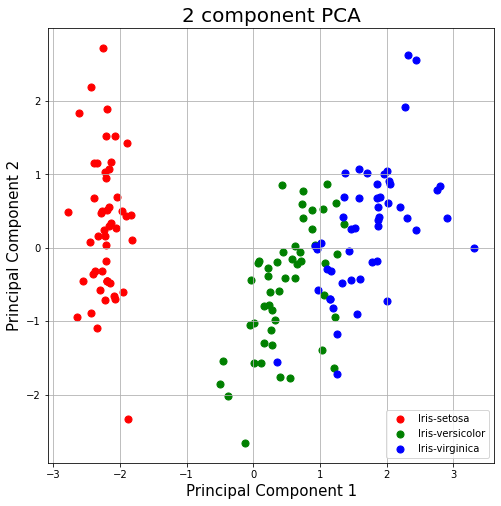

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [24]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

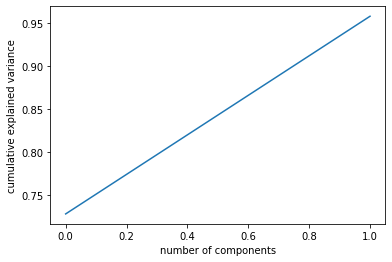

In [25]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [33]:
df['target'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: target, dtype: int64

In [34]:
df['target'] = df['target'].map({'Iris-virginica': 0, 'Iris-versicolor': 1, 'Iris-setosa': 2})

In [35]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df

In [37]:
pca = sklearnPCA(n_components=2)
pca.fit_transform(df)

# Call function to create importance df
importance_df  = create_importance_dataframe(pca, df)

# Show first few rows
display(importance_df.head())

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:2]
print(), print(f'PC1 top 2 features are \n')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:2]
print(), print(f'PC2 top 2 features are \n')
display(pc2_top_10_features )

,PC1,PC2
sepal length,0.334186,0.688580
sepal width,0.078261,0.684103
petal length,0.800463,0.098763
petal width,0.337083,0.068198
target,0.357532,0.208459



PC1 top 2 features are 



petal length    0.800463
target          0.357532
Name: PC1, dtype: float64


PC2 top 2 features are 



sepal length    0.688580
sepal width     0.684103
Name: PC2, dtype: float64